PPT Link for our regression project- Dataset-6 Medical insurance premium dataset
https://www.canva.com/design/DAGv4Gto7Cs/YQbPJvvHLtMpOC7z18B42g/edit?utm_content=DAGv4Gto7Cs&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton



In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
#shape
df.shape

(1338, 7)

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.rename(columns = {'sex':'gender'}, inplace = True)
df.rename(columns = {'bmi': 'BMI'}, inplace = True)
df

,age,gender,BMI,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df['region'].unique()
df

,age,gender,BMI,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


MAP FUNCTION

In [ ]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['gender'] = df.gender.map({"female":0, 'male':1})

In [ ]:
df['gender'].unique()

array([0, 1])

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['smoker'] = df.smoker.map({'yes':1, 'no':0})

In [ ]:
df['smoker'].unique()

array([1, 0])

In [ ]:
df

,age,gender,BMI,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


DUPLICATE values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1337, 7)

converting object type to numeric type

> Add blockquote



In [ ]:
df.columns

Index(['age', 'gender', 'BMI', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 -Q1
df= df[(df['charges'] >= Q1 - 1.5 * IQR) & (df['charges'] <= Q3 + 1.5 * IQR)]


In [ ]:
df['charges'] = np.log(df['charges'])

/tmp/ipython-input-2188056054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['charges'] = np.log(df['charges'])


In [ ]:
df['charges']=np.exp(df['charges'])

/tmp/ipython-input-3496629517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['charges']=np.exp(df['charges'])


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
from scipy.stats import zscore

In [ ]:
df['z_score'] = zscore(df['charges'])

/tmp/ipython-input-1883124299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score'] = zscore(df['charges'])


In [ ]:
threshold = 3
df['Outlier'] = abs(df['z_score']) > threshold

/tmp/ipython-input-3524728624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlier'] = abs(df['z_score']) > threshold


In [ ]:
df['Outlier'].unique()

array([False,  True])

In [ ]:
df1 = df[df['Outlier'] == False].reset_index(drop=True)
df1

,age,gender,BMI,children,smoker,region,charges,z_score,Outlier
0,19,0,27.900,0,1,southwest,16884.92400,0.960352,False
1,18,1,33.770,1,0,southeast,1725.55230,-1.134296,False
2,28,1,33.000,3,0,southeast,4449.46200,-0.757919,False
3,33,1,22.705,0,0,northwest,21984.47061,1.664982,False
4,32,1,28.880,0,0,northwest,3866.85520,-0.838421,False
...,...,...,...,...,...,...,...,...,...
1177,50,1,30.970,3,0,northwest,10600.54830,0.092008,False
1178,18,0,31.920,0,0,northeast,2205.98080,-1.067913,False
1179,18,0,36.850,0,0,southeast,1629.83350,-1.147522,False
1180,21,0,25.800,0,0,southwest,2007.94500,-1.095276,False


In [ ]:
df1 = df1.drop(['z_score','Outlier'], axis=1)

In [ ]:
cols_to_check = ['BMI', 'smoker','charges']

In [ ]:
z_scores = df[cols_to_check].apply(zscore)

In [ ]:
threshold = 3
outliers = (z_scores.abs() > threshold).any(axis=1)

In [ ]:
df['Outlier'] = outliers
df1 = df[~outliers].reset_index(drop=True)

/tmp/ipython-input-1553210202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlier'] = outliers


In [ ]:
df1.drop('Outlier', axis=1, inplace=True)

In [ ]:
df1.drop('z_score', axis=1, inplace=True)

In [ ]:
df1.head()

,age,gender,BMI,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
df1.columns

Index(['age', 'gender', 'BMI', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df1 = pd.get_dummies(df1, columns=['region'], drop_first=False)
df1.head()

,age,gender,BMI,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [ ]:
df1 = df1.astype({col: int for col in df1.columns if df1[col].dtype == 'bool'})
df1.head()

,age,gender,BMI,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [ ]:
df1[df1.select_dtypes(include='bool').columns] = df1.select_dtypes(include='bool').astype(int)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1179 non-null   int64  
 1   gender            1179 non-null   int64  
 2   BMI               1179 non-null   float64
 3   children          1179 non-null   int64  
 4   smoker            1179 non-null   int64  
 5   charges           1179 non-null   float64
 6   region_northeast  1179 non-null   int64  
 7   region_northwest  1179 non-null   int64  
 8   region_southeast  1179 non-null   int64  
 9   region_southwest  1179 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 92.2 KB


In [ ]:
#finding missing values
df1.isnull().sum()

,0
age,0
gender,0
BMI,0
children,0
smoker,0
charges,0
region_northeast,0
region_northwest,0
region_southeast,0
region_southwest,0


In [ ]:
#missing percentage
df.isnull().sum()/df.shape[0]*100

,0
age,0.0
gender,0.0
BMI,0.0
children,0.0
smoker,0.0
region,0.0
charges,0.0
z_score,0.0
Outlier,0.0


REPLACING NULL VALUES

In [ ]:
#finding duplicates
df.duplicated().sum()


np.int64(0)

In [ ]:
#identifiying garbage values
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)

region
southeast    307
northwest    304
northeast    296
southwest    291
Name: count, dtype: int64
******************************


STEP:4  EXPLORATORY DATA ANALYSIS

In [ ]:
#descriptive statistics
df.describe()


,age,gender,BMI,children,smoker,charges,z_score
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1.198000e+03
mean,39.006678,0.489149,30.094787,1.085142,0.115192,9934.671758,9.341442e-17
std,14.062040,0.500091,6.013044,1.214407,0.319387,7240.216987,1.000418e+00
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,-1.217709e+00
25%,26.000000,0.000000,25.800000,0.000000,0.000000,4418.591063,-7.621849e-01
50%,39.000000,0.000000,29.735000,1.000000,0.000000,8411.754950,-2.104292e-01
75%,51.000000,1.000000,33.820000,2.000000,0.000000,12955.356300,4.173834e-01
max,64.000000,1.000000,53.130000,5.000000,1.000000,34472.841000,3.390564e+00


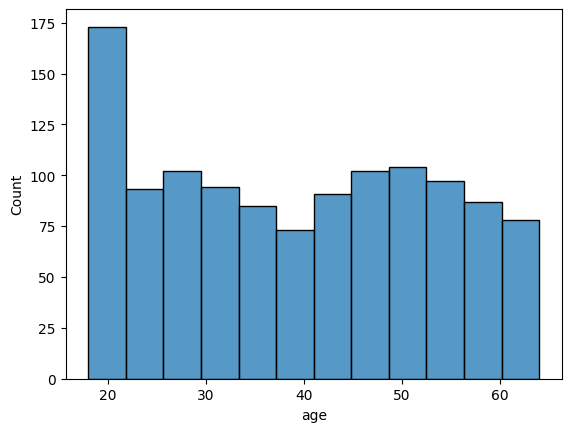

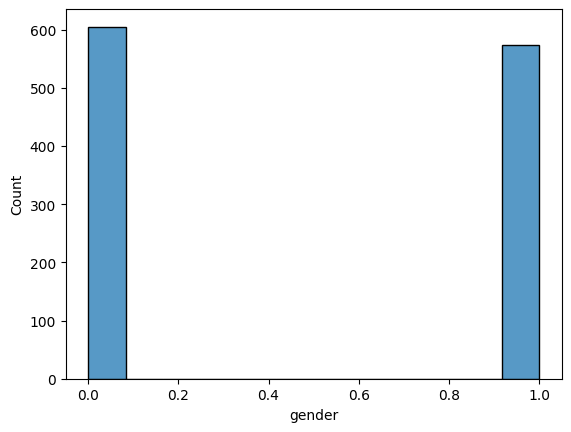

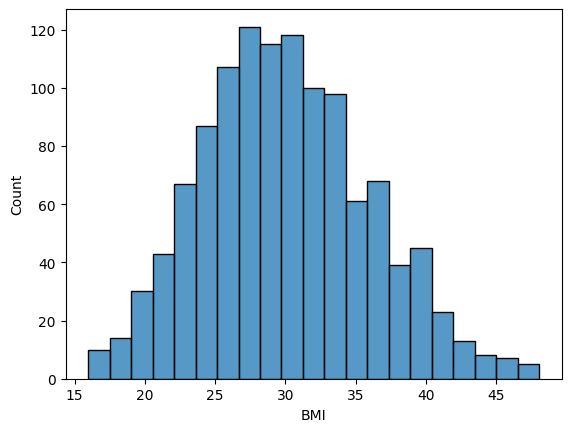

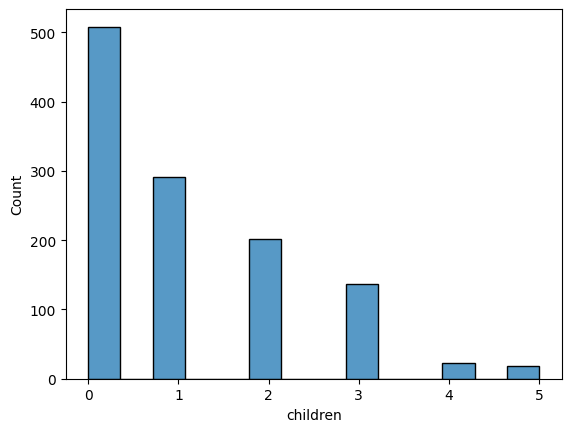

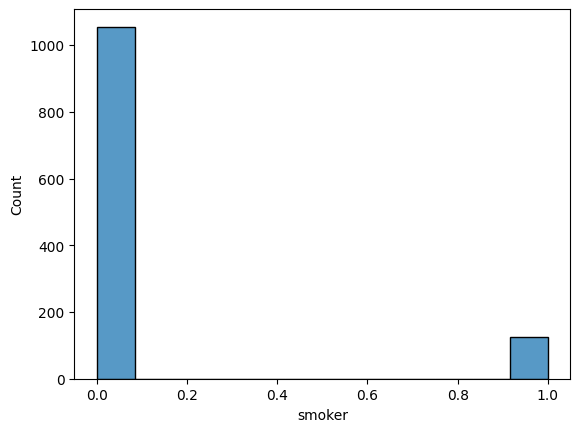

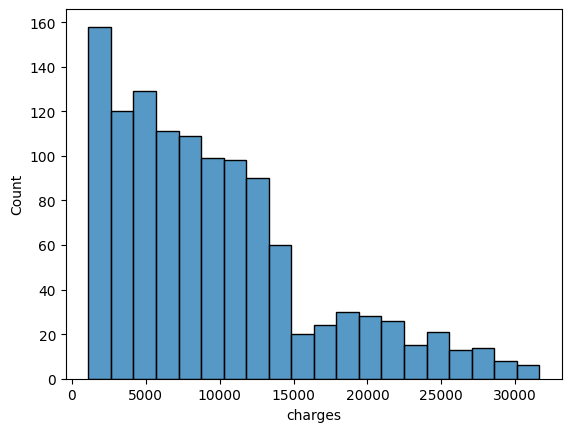

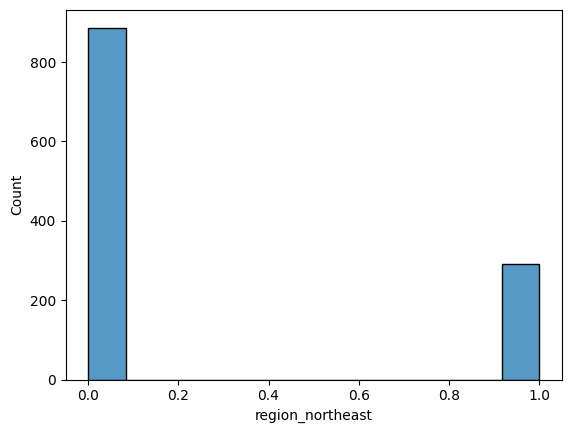

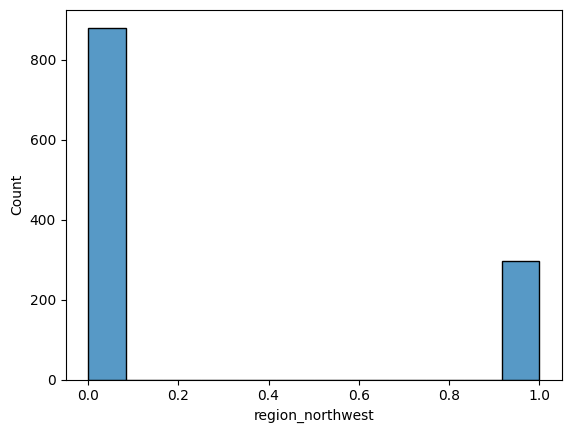

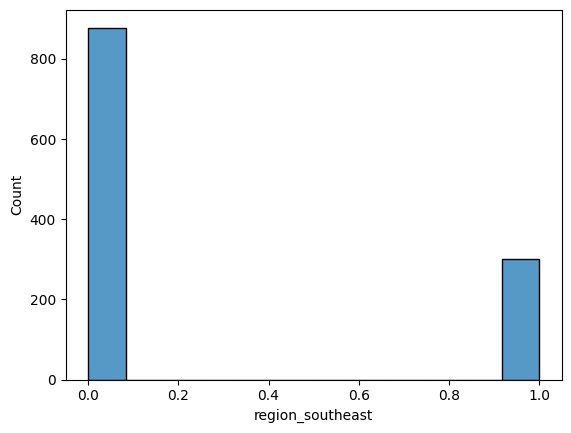

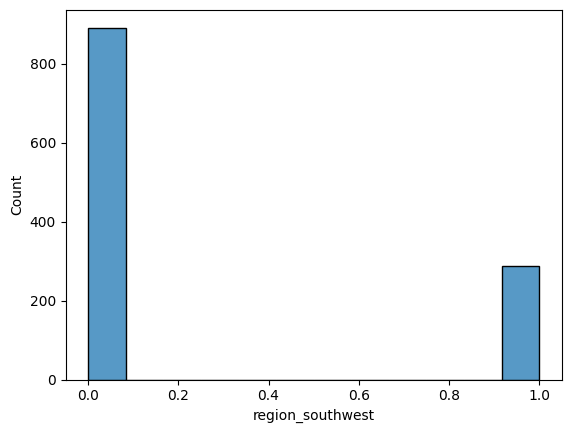

In [ ]:
#histogram to understand the distribution
for i in df1.select_dtypes(include="number").columns:
  sns.histplot(data=df1,x=i)
  plt.show()

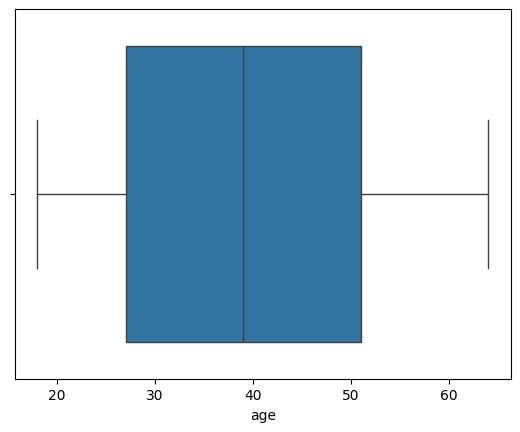

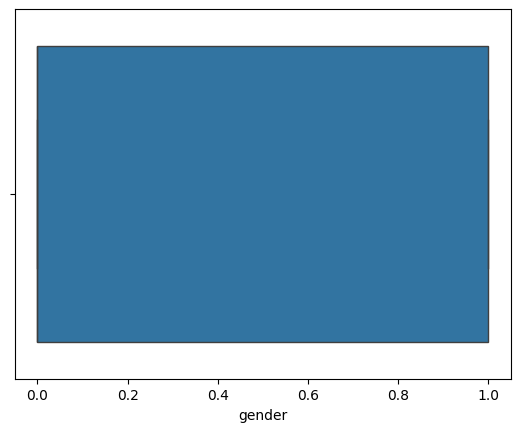

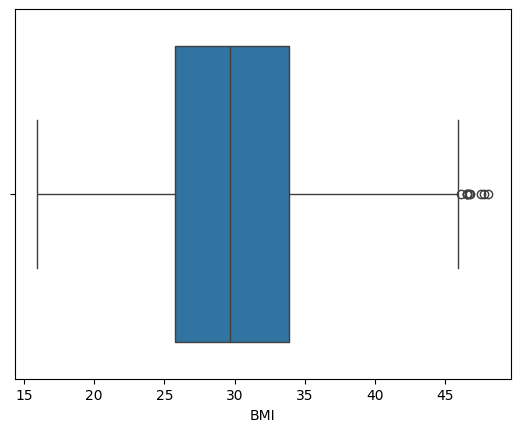

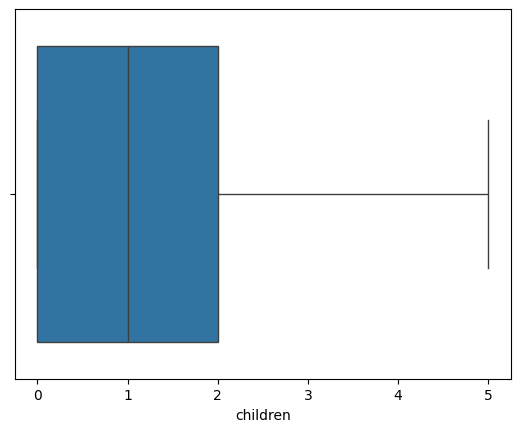

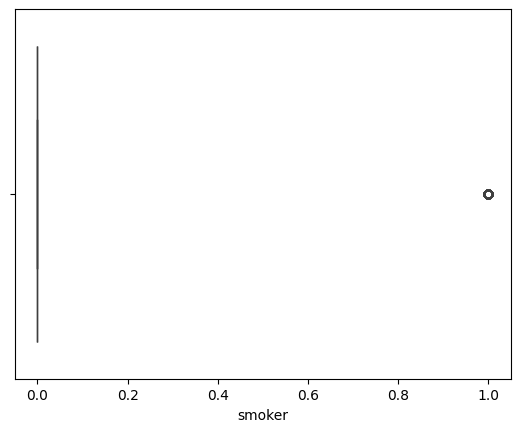

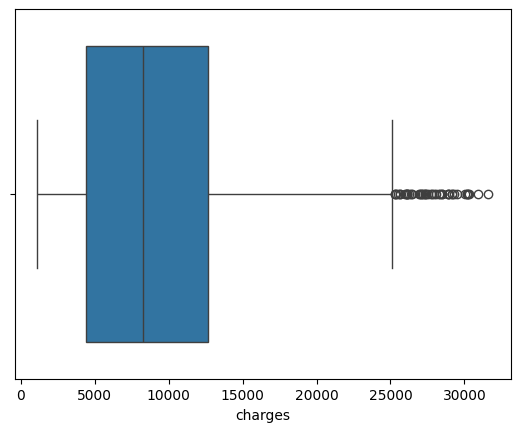

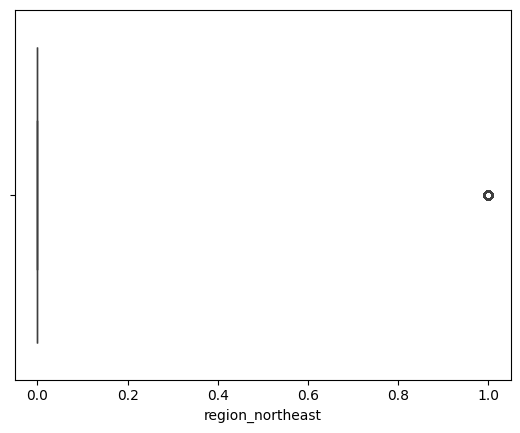

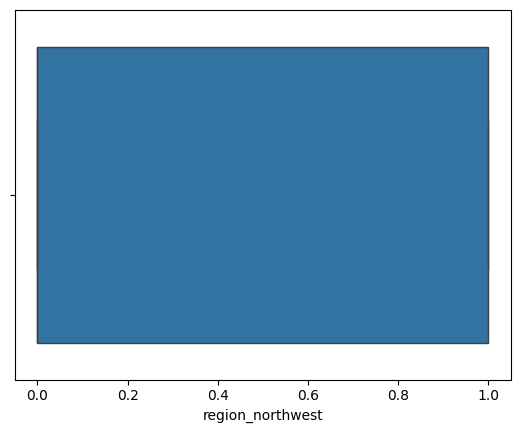

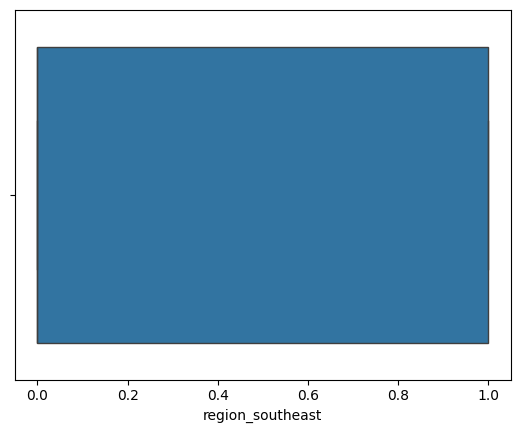

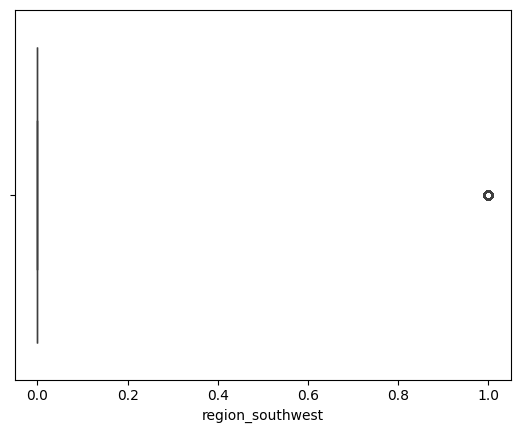

In [ ]:
#box-plot to identify the outliers
for i in df1.select_dtypes(include="number").columns:
  sns.boxplot(data=df1,x=i)
  plt.show()

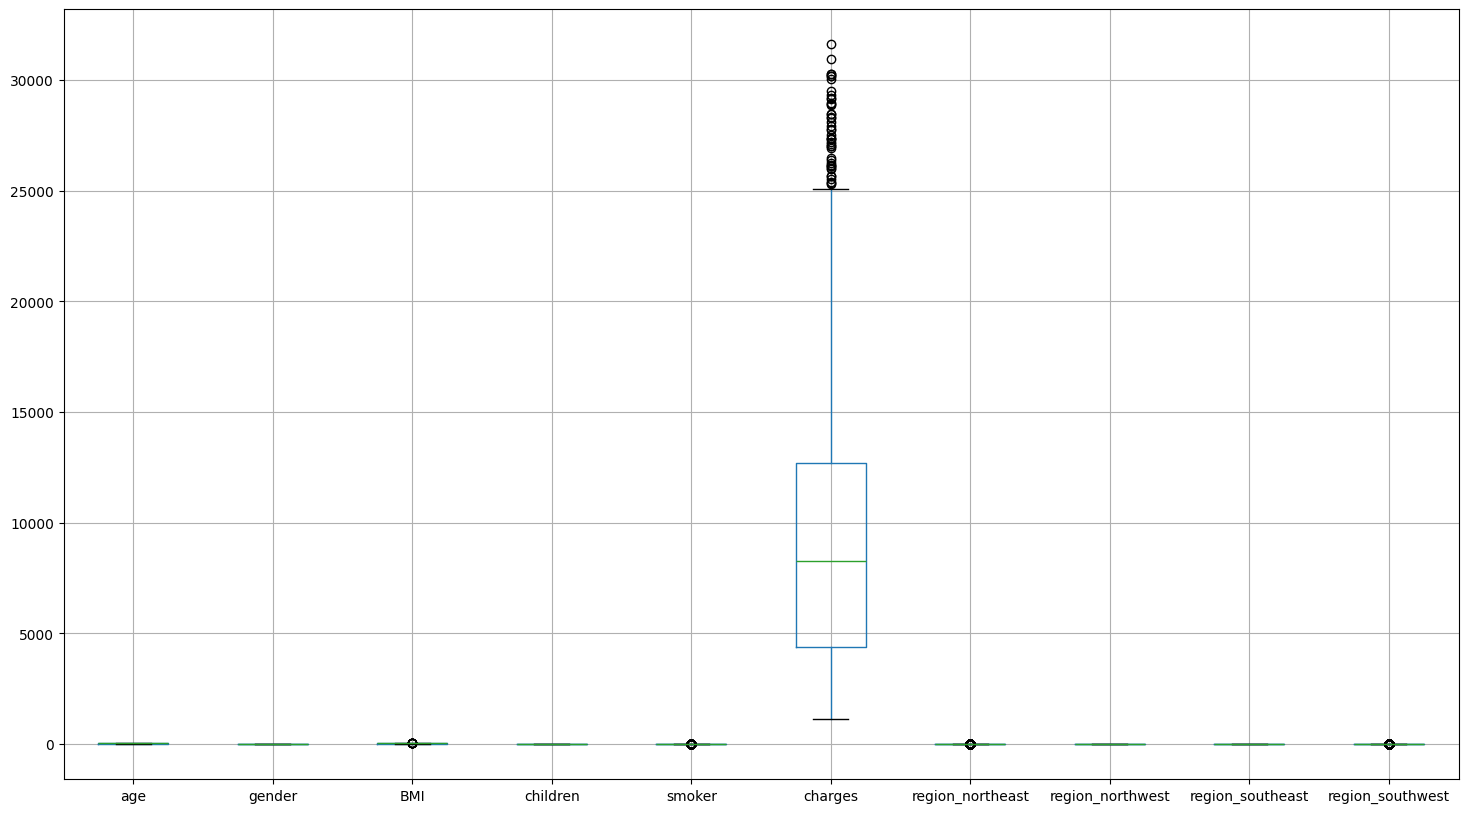

In [ ]:
df1.boxplot(figsize=(18,10))
plt.show()

removing outliers.

In [ ]:
df_clean=df1.copy()

In [ ]:
print(df_clean)

      age  gender     BMI  children  smoker      charges  region_northeast  \
0      19       0  27.900         0       1  16884.92400                 0   
1      18       1  33.770         1       0   1725.55230                 0   
2      28       1  33.000         3       0   4449.46200                 0   
3      33       1  22.705         0       0  21984.47061                 0   
4      32       1  28.880         0       0   3866.85520                 0   
...   ...     ...     ...       ...     ...          ...               ...   
1174   50       1  30.970         3       0  10600.54830                 0   
1175   18       0  31.920         0       0   2205.98080                 1   
1176   18       0  36.850         0       0   1629.83350                 0   
1177   21       0  25.800         0       0   2007.94500                 0   
1178   61       0  29.070         0       1  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  
0 

In [ ]:
df_clean.shape

(1179, 10)

<Axes: ylabel='charges'>

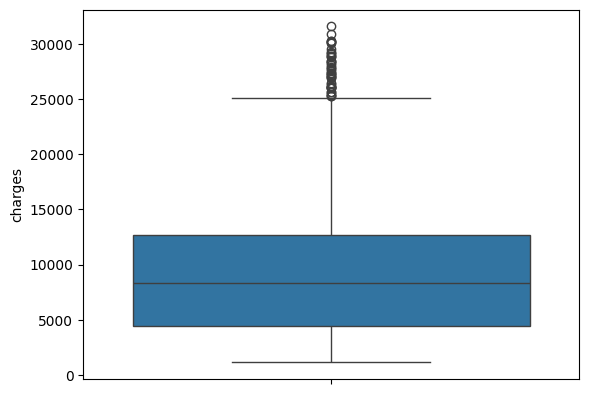

In [ ]:
sns.boxplot(df_clean['charges'])

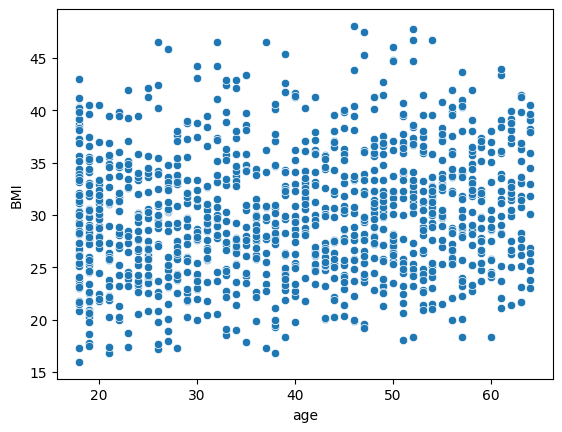

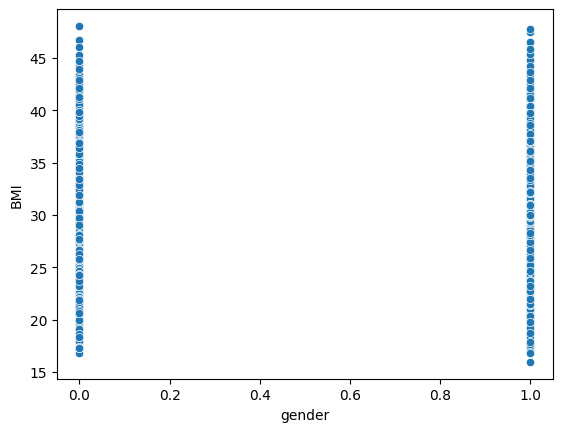

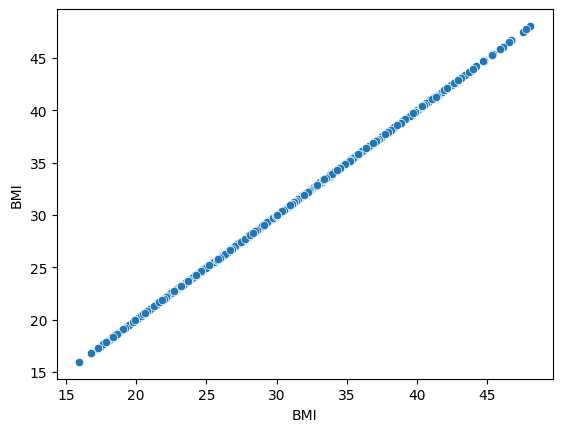

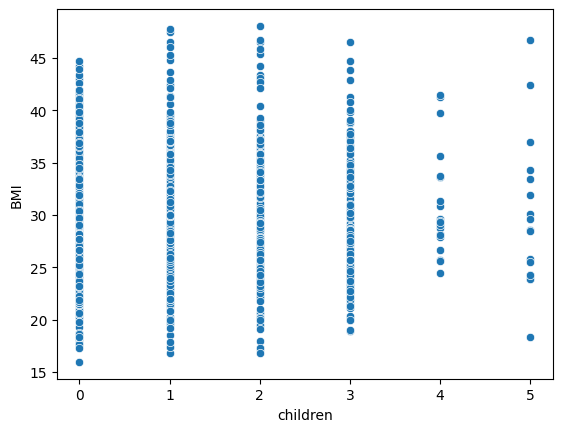

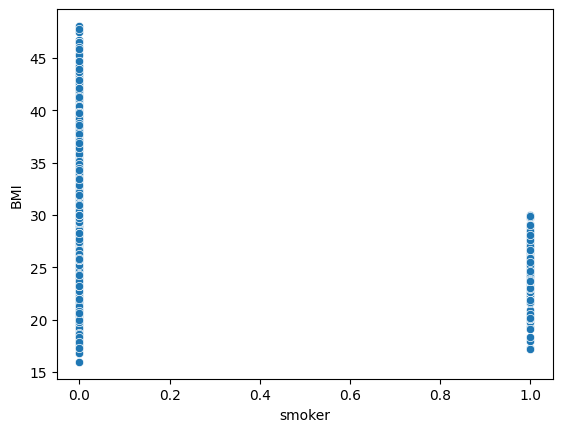

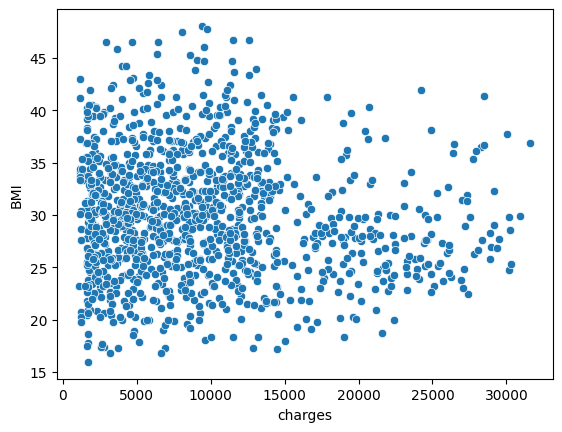

In [ ]:
#scatter plot
for i in['age', 'gender', 'BMI', 'children', 'smoker', 'charges']:
  sns.scatterplot(data=df_clean,x=i,y= 'BMI',)
  plt.show()


In [ ]:
df_clean.select_dtypes(include='number').columns

Index(['age', 'gender', 'BMI', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

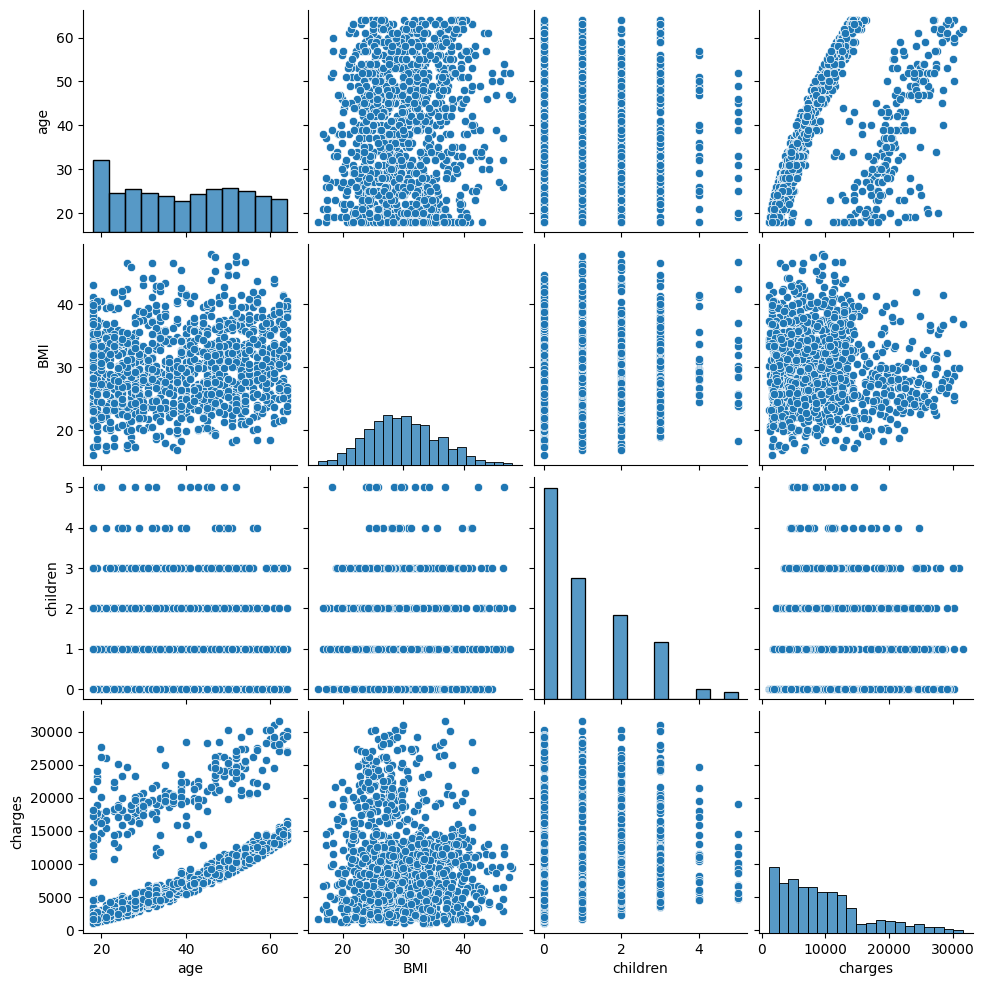

In [ ]:
sns.pairplot(df_clean[['age','BMI','children','charges']])
plt.show()

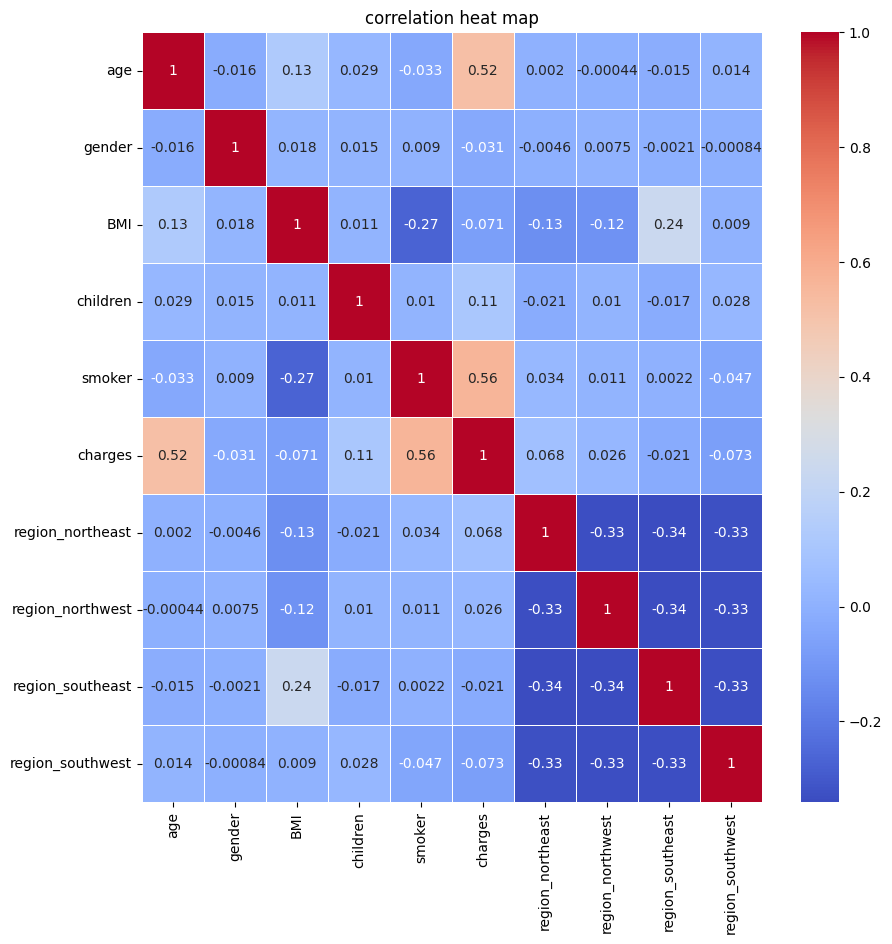

In [ ]:
numeric_df=df_clean.select_dtypes(include='number')
plt.figure(figsize=(10,10))
heatmap=sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("correlation heat map")
plt.show()

correlation with heat map to interpret the relation and multicolliniarity

In [ ]:
df_clean.select_dtypes(include='number').corr()

,age,gender,BMI,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.016474,0.128848,0.029172,-0.032804,0.519966,0.001969,-0.000437,-0.015376,0.014068
gender,-0.016474,1.000000,0.017830,0.015259,0.009017,-0.030627,-0.004565,0.007488,-0.002113,-0.000844
BMI,0.128848,0.017830,1.000000,0.010850,-0.269587,-0.070702,-0.131060,-0.115373,0.235904,0.008965
children,0.029172,0.015259,0.010850,1.000000,0.010315,0.105920,-0.021002,0.010353,-0.017323,0.028209
smoker,-0.032804,0.009017,-0.269587,0.010315,1.000000,0.563104,0.033878,0.010549,0.002173,-0.046911
charges,0.519966,-0.030627,-0.070702,0.105920,0.563104,1.000000,0.068079,0.026257,-0.021500,-0.073136
region_northeast,0.001969,-0.004565,-0.131060,-0.021002,0.033878,0.068079,1.000000,-0.333695,-0.335943,-0.326202
region_northwest,-0.000437,0.007488,-0.115373,0.010353,0.010549,0.026257,-0.333695,1.000000,-0.340531,-0.330657
region_southeast,-0.015376,-0.002113,0.235904,-0.017323,0.002173,-0.021500,-0.335943,-0.340531,1.000000,-0.332884
region_southwest,0.014068,-0.000844,0.008965,0.028209,-0.046911,-0.073136,-0.326202,-0.330657,-0.332884,1.000000


OUTLIERS

MISSING VALUES TREATMENTS

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
BMI,0
children,0
smoker,0
region,0
charges,0
z_score,0
Outlier,0


To count of smoker vs non-smoker

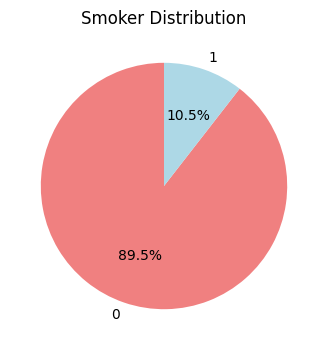

In [ ]:
#Piechart 1
smoker_counts=df_clean['smoker'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(smoker_counts,labels=smoker_counts.index,autopct='%1.1f%%',startangle=90,colors=['lightcoral','lightblue'])
plt.title('Smoker Distribution')
plt.show()

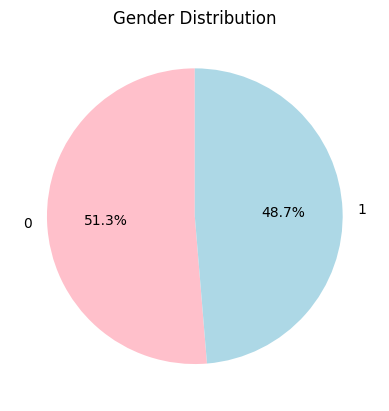

In [ ]:
sex_counts = df_clean['gender'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=90)
plt.title('Gender Distribution')
plt.show()

To find out distribution of charges.

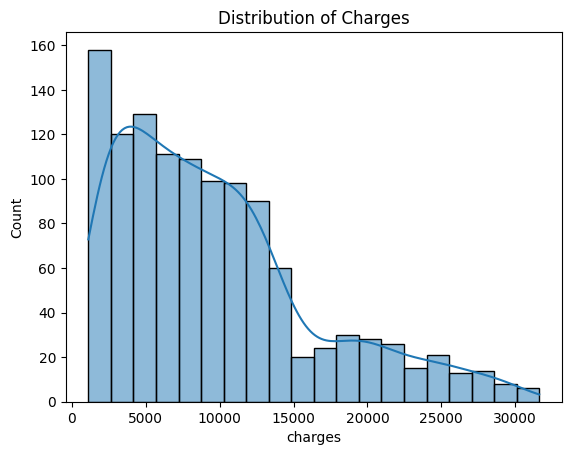

In [ ]:
sns.histplot(df_clean['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()


/tmp/ipython-input-3980496778.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=df_clean, palette="pastel")


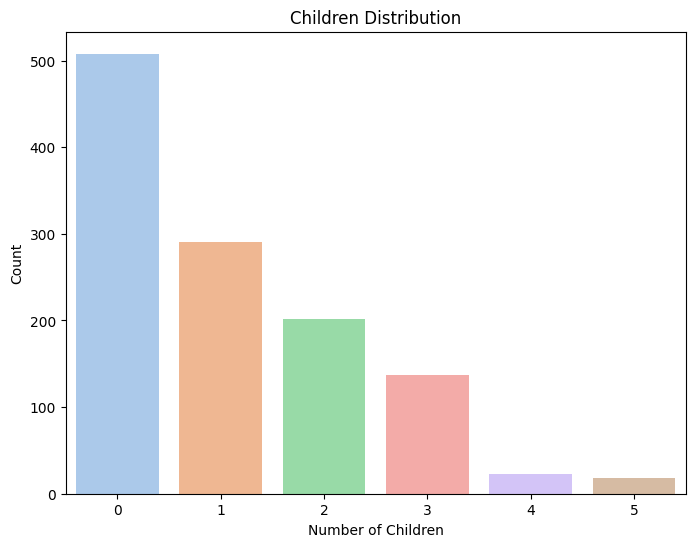

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='children', data=df_clean, palette="pastel")
plt.title("Children Distribution")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.show()


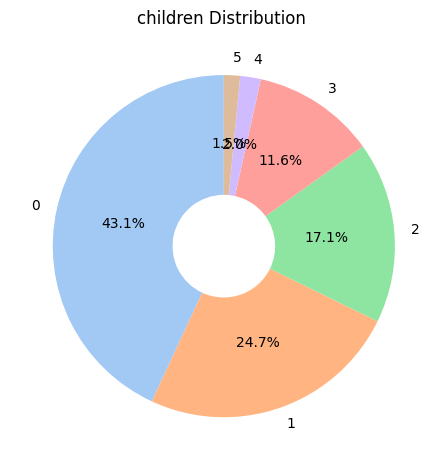

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Gender distribution
children_counts = df_clean['children'].value_counts()

# Get pastel colors
colors = sns.color_palette("pastel")[0:len(children_counts)]

# Create doughnut chart
plt.pie(
    children_counts,
    labels=children_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width':0.7}
)

plt.title("children Distribution ")
plt.tight_layout()
plt.show()

In [ ]:
df_clean

,age,gender,BMI,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1174,50,1,30.970,3,0,10600.54830,0,1,0,0
1175,18,0,31.920,0,0,2205.98080,1,0,0,0
1176,18,0,36.850,0,0,1629.83350,0,0,1,0
1177,21,0,25.800,0,0,2007.94500,0,0,0,1


Importing Libraries

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

seprating feature and target variables

In [ ]:
x=df_clean.drop(['charges'],axis=1)
y=np.log(df_clean['charges'])

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x[x.select_dtypes(include='bool').columns] = x.select_dtypes(include='bool').astype(int)


In [ ]:
x

,age,gender,BMI,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1174,50,1,30.970,3,0,0,1,0,0
1175,18,0,31.920,0,0,1,0,0,0
1176,18,0,36.850,0,0,0,0,1,0
1177,21,0,25.800,0,0,0,0,0,1


vif

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x = df_clean.drop(['charges'], axis=1)
x

,age,gender,BMI,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1174,50,1,30.970,3,0,0,1,0,0
1175,18,0,31.920,0,0,1,0,0,0
1176,18,0,36.850,0,0,0,0,1,0
1177,21,0,25.800,0,0,0,0,0,1


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
vif_data

,feature,VIF
0,age,1.020381
1,gender,1.001250
2,BMI,1.177586
3,children,1.002632
4,smoker,1.085016
5,region_northeast,9.433110
6,region_northwest,9.674122
7,region_southeast,11.454903
8,region_southwest,9.899755


In [ ]:
x = df_clean.drop(['region_southeast'], axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
vif_data

,feature,VIF
0,age,14.178075
1,gender,1.926307
2,BMI,9.420988
3,children,1.821303
4,smoker,2.028917
5,charges,7.900202
6,region_northeast,1.766011
7,region_northwest,1.786104
8,region_southwest,1.806855


In [ ]:
x = df_clean.drop(['age'], axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
vif_data

,feature,VIF
0,gender,1.003218
1,BMI,1.173578
2,children,1.017255
3,smoker,1.609055
4,charges,1.520652
5,region_northeast,8.525018
6,region_northwest,8.725336
7,region_southeast,10.548568
8,region_southwest,8.922607


In [ ]:
x = df_clean.drop(['charges'],axis=1)

Train Split Method

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=42)
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y,test_size=0.25,random_state=42)
x_train3,x_test3,y_train3,y_test3 = train_test_split(x,y,test_size=0.3,random_state=42)
x_train4,x_test4,y_train4,y_test4 = train_test_split(x,y,test_size=0.4,random_state=42)


Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train1,y_train1)

LinearRegression()

In [ ]:
y_pred1=model.predict(x_test1)

In [ ]:
linear=pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
linear

,Predicted,Actual
210,8.482180,8.403622
58,9.311713,9.715818
671,9.607860,9.854343
582,9.254054,10.180826
218,7.948525,7.594348
...,...,...
519,8.305256,8.258736
813,9.485774,9.506818
224,8.589356,8.594336
971,9.936440,9.727723


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.5786883208218756

In [ ]:

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test1,y_pred1)

0.2682975736780337

In [ ]:

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test1,y_pred1)
mse

0.2522616006770405

In [ ]:

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test1,y_pred1)

0.029111287835396068

In [ ]:
rmse=np.sqrt(mse)
rmse


np.float64(0.5022565088448735)

In [ ]:

from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test1,y_pred1)
print(mape)
mape=mape*100
mape

0.029111287835396068


2.9111287835396067

In [ ]:
model.fit(x_train2,y_train2)

LinearRegression()

In [ ]:
y_pred2=model.predict(x_test2)

In [ ]:
linear=pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
linear

,Predicted,Actual
210,8.484011,8.403622
58,9.301965,9.715818
671,9.602726,9.854343
582,9.258079,10.180826
218,7.946512,7.594348
...,...,...
1039,8.136657,7.972290
1175,7.927713,7.698927
622,9.398773,9.236441
788,8.971489,8.887903


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.6215946668906674

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test2,y_pred2)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test2,y_pred2)
print("mse=",mse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test2,y_pred2)
rmse=np.sqrt(mse)
print("rmse=",rmse)
mape=mape*100
print("mape=",mape)

mae= 0.2527365207059875
mse= 0.22295216574201235
rmse= 0.47217810807153304
mape= 2.754729756181413


In [ ]:
model.fit(x_train3,y_train3)

LinearRegression()

In [ ]:
y_pred3=model.predict(x_test3)

In [ ]:
linear=pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
linear

,Predicted,Actual
210,8.487399,8.403622
58,9.307238,9.715818
671,9.597672,9.854343
582,9.265339,10.180826
218,7.956388,7.594348
...,...,...
660,9.710984,9.880180
584,8.876713,8.769604
566,9.582227,9.483710
72,9.263791,9.312281


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.6410712777534211

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test3,y_pred3)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test3,y_pred3)
print("mse=",mse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test3,y_pred3)
rmse=np.sqrt(mse)
print("rmse=",rmse)
mape=mape*100
print("mape=",mape)

mae= 0.24919685105385622
mse= 0.2166666442357614
rmse= 0.4654746440309734
mape= 2.7197024096063642


In [ ]:
model.fit(x_train4,y_train4)

LinearRegression()

In [ ]:
y_pred4=model.predict(x_test4)

In [ ]:
linear=pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
linear

,Predicted,Actual
210,8.477172,8.403622
58,9.262128,9.715818
671,9.566935,9.854343
582,9.279282,10.180826
218,7.929108,7.594348
...,...,...
557,8.206821,8.121679
801,8.609130,8.486099
570,8.733622,8.719900
365,9.045655,9.120520


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.6619697316611222

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test4,y_pred4)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test4,y_pred4)
print("mse=",mse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test4,y_pred4)
rmse=np.sqrt(mse)
print("rmse=",rmse)
mape=mape*100
print("mape=",mape)

mae= 0.24344279154928838
mse= 0.20080226461354636
rmse= 0.44810965690726456
mape= 2.6674234817237323


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, x, y, scoring="neg_mean_absolute_error", cv=5)
print("Cross-validated MAE:", -np.mean(scores))


Cross-validated MAE: 0.23246408277678077


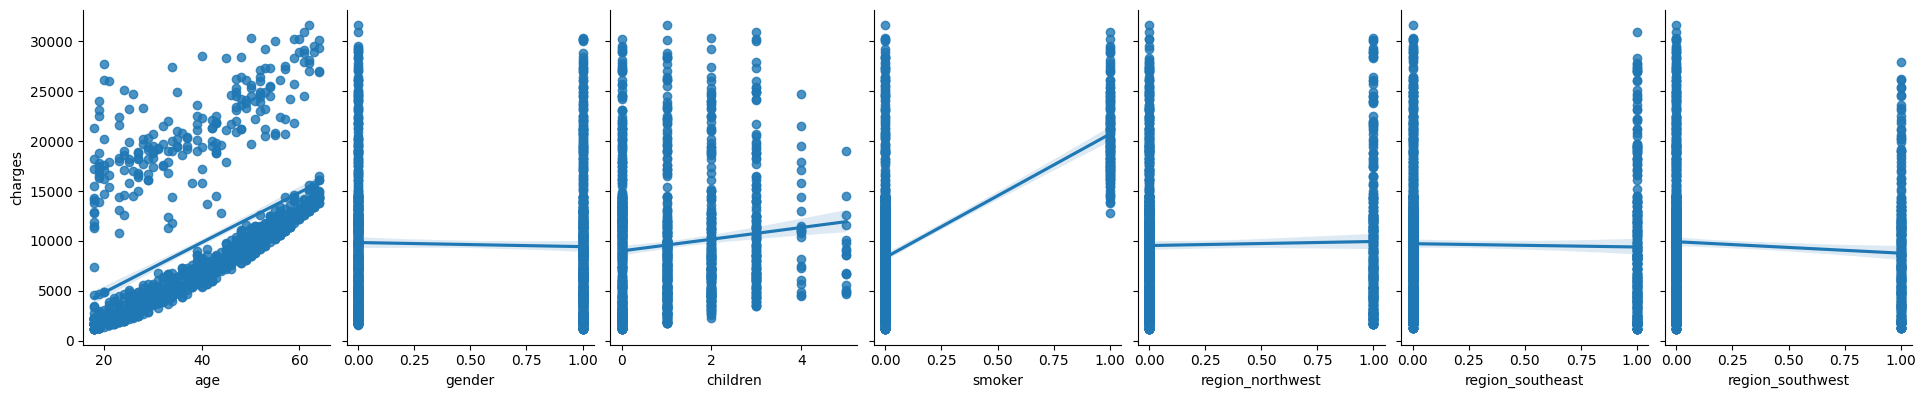

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_clean,
             x_vars=['age', 'gender', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest'],
             y_vars='charges',
             height=4, aspect=0.7, kind='reg')

plt.show()

KNN Regression Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors=2)

In [ ]:
model.fit(x_train1,y_train1)
y_pred1 = model.predict(x_test1)
y_pred1

array([ 8.38479224,  8.08741684,  9.63727148,  9.06112777,  7.79408082,
        8.7986336 ,  9.10957305,  9.14445217,  9.64159663,  9.41986202,
        7.44044691,  8.93832343,  9.68507585,  9.00183372,  9.80907311,
        7.90471725,  8.20940816,  9.75807207,  7.03588915,  9.70407679,
        9.12311759,  8.96841724,  8.32134242,  9.08188075,  7.76430897,
        8.48773527,  9.31787587,  9.06619715,  8.29275513,  8.79184804,
        8.49617767,  9.55520921,  9.5487334 ,  9.09450181,  9.38519094,
        9.1961272 ,  9.07053634,  7.88336505,  9.42675499,  7.59060408,
        9.55520921,  9.15404732,  7.90471725,  9.19425148,  9.42863087,
        8.96299918,  9.12710026,  9.03172264,  8.96740718,  9.55520921,
        8.91792655,  9.17545795,  9.53284754,  9.18529529,  8.82313418,
        9.56966185,  9.64159663,  9.33729044,  8.70782244,  9.08397614,
        9.10476475,  9.22963474,  7.44415897,  9.02249044,  8.7125172 ,
        7.69784943,  8.93832343,  9.4072952 ,  7.14017605,  9.52

In [ ]:
knn=pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

,Predicted,Actual
210,8.384792,8.403622
58,8.087417,9.715818
671,9.637271,9.854343
582,9.061128,10.180826
218,7.794081,7.594348
...,...,...
519,8.215150,8.258736
813,9.835955,9.506818
224,8.700743,8.594336
971,8.445441,9.727723


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.2968290801103902

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

0.39444136489321546

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

0.4210256457806503

In [ ]:
rmse=np.sqrt(mse)
rmse

np.float64(0.44810965690726456)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test1,y_pred1)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test1,y_pred1)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)
mse=mean_squared_error(y_test1,y_pred1)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test1,y_pred1)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.2968290801103902
mae= 0.39444136489321546
mse= 0.4210256457806503
rmse= 0.6488648902357488
0.04293455763960071
mape= 4.293455763960071


In [ ]:
model.fit(x_train2,y_train2)
y_pred2 = model.predict(x_test2)
y_pred2

array([ 8.38479224,  8.08741684,  9.63727148,  9.06112777,  7.79408082,
        8.7986336 ,  9.10957305,  9.14445217,  9.64159663,  9.41986202,
        7.44044691,  8.64983368,  9.68507585,  9.00183372,  9.80907311,
        7.6740444 ,  8.20940816,  9.75807207,  7.03588915,  9.70407679,
        9.12311759,  8.96841724,  8.32134242,  9.08188075,  7.76430897,
        8.48773527,  9.31787587,  9.06619715,  8.29275513,  8.79184804,
        8.49617767,  9.5482075 ,  9.5487334 ,  9.09450181,  9.38519094,
        9.1961272 ,  9.07489462,  7.88336505,  9.42675499,  7.59060408,
        9.5482075 ,  9.15404732,  7.6740444 ,  9.19425148,  9.42863087,
        8.96299918,  9.12710026,  9.03172264,  8.96740718,  9.5482075 ,
        8.91792655,  9.17545795,  9.53284754,  9.18529529,  8.82313418,
        9.56966185,  9.64159663,  9.33729044,  8.70782244,  9.01268049,
        9.10476475,  9.22963474,  7.44415897,  9.02249044,  8.7125172 ,
        7.69784943,  8.64983368,  9.4072952 ,  7.14017605,  9.52

In [ ]:
knn=pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

,Predicted,Actual
210,8.384792,8.403622
58,8.087417,9.715818
671,9.637271,9.854343
582,9.061128,10.180826
218,7.794081,7.594348
...,...,...
1039,8.398635,7.972290
1175,7.544720,7.698927
622,9.310215,9.236441
788,8.802017,8.887903


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test2,y_pred2)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test2,y_pred2)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)
mse=mean_squared_error(y_test2,y_pred2)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test2,y_pred2)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.3463709738882985
mae= 0.3722354796016659
mse= 0.38511086978084696
rmse= 0.6205730172839027
0.040705161962291236
mape= 4.070516196229123


In [ ]:
model.fit(x_train3,y_train3)
y_pred3 = model.predict(x_test3)
y_pred3

array([ 8.38479224,  8.08741684,  9.63727148,  9.06112777,  7.79408082,
        8.7986336 ,  9.10957305,  9.14445217,  9.58285989,  9.41986202,
        7.44044691,  8.64983368,  9.68507585,  9.00183372,  9.80907311,
        7.6740444 ,  8.20940816,  9.75807207,  7.03588915,  9.70407679,
        9.12311759,  8.96841724,  8.32134242,  9.08188075,  8.76207355,
        8.48773527,  9.31787587,  9.06619715,  8.29275513,  9.28173209,
        8.49617767,  9.5482075 ,  9.5487334 ,  9.09450181,  9.38519094,
        9.1961272 ,  9.07489462,  8.13685164,  9.42675499,  7.59060408,
        9.5482075 ,  9.15404732,  7.6740444 ,  9.1688861 ,  9.42863087,
        8.96299918,  9.12710026,  9.03172264,  8.96740718,  9.5482075 ,
        8.91792655,  9.17545795,  9.53284754,  9.18529529,  8.82313418,
        9.56966185,  9.55121508,  9.33729044,  8.70782244,  9.01268049,
        9.10476475,  9.22963474,  7.44415897,  9.54806193,  8.7125172 ,
        7.69784943,  8.64983368,  9.4072952 ,  7.14017605,  8.71

In [ ]:
knn=pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

,Predicted,Actual
210,8.384792,8.403622
58,8.087417,9.715818
671,9.637271,9.854343
582,9.061128,10.180826
218,7.794081,7.594348
...,...,...
660,9.205957,9.880180
584,8.604807,8.769604
566,9.499091,9.483710
72,9.307817,9.312281


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test3,y_pred3)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test3,y_pred3)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)
mse=mean_squared_error(y_test3,y_pred3)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test3,y_pred3)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.36715509551205705
mae= 0.38216592275317196
mse= 0.3820156295068149
rmse= 0.6180741294592542
0.04219214919752057
mape= 4.219214919752057


In [ ]:
model.fit(x_train4,y_train4)
y_pred4 = model.predict(x_test4)
y_pred4

array([ 8.35544615,  8.08741684,  9.63727148,  9.06112777,  7.79408082,
        8.7986336 ,  9.10957305,  9.14445217,  9.58285989,  9.41986202,
        7.44044691,  8.64983368,  9.68507585,  9.00187506,  9.80907311,
        7.6740444 ,  8.20940816,  9.75807207,  7.03588915,  9.70407679,
        9.09393023,  8.96841724,  8.32134242,  9.08188075,  7.74208071,
        8.48773527,  9.29305445,  9.07741134,  8.23860947,  9.28173209,
        8.49617767,  9.5482075 ,  9.50082598,  9.09450181,  9.76095762,
        9.1961272 ,  9.07489462,  8.13685164,  9.42675499,  8.74863675,
        9.5482075 ,  9.15404732,  7.6740444 ,  9.1688861 ,  9.42863087,
        8.96299918,  9.12710026,  9.03172264,  8.96740718,  9.5482075 ,
        8.93213312,  9.03637597,  9.53284754,  9.18529529,  8.82313418,
        9.56966185,  9.55121508,  9.42833401,  8.70782244,  9.01268049,
        9.10476475,  9.22963474,  7.44415897,  9.54806193,  8.7125172 ,
        7.69784943,  8.64983368,  9.4072952 ,  7.1890845 ,  8.71

In [ ]:
knn=pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

,Predicted,Actual
210,8.355446,8.403622
58,8.087417,9.715818
671,9.637271,9.854343
582,9.061128,10.180826
218,7.794081,7.594348
...,...,...
557,8.163098,8.121679
801,8.267811,8.486099
570,8.846728,8.719900
365,9.189553,9.120520


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test4,y_pred4)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test4,y_pred4)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)
mse=mean_squared_error(y_test4,y_pred4)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test4,y_pred4)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.37034926761907083
mae= 0.3742898588732514
mse= 0.37403541877769453
rmse= 0.6115843513185197
0.041353779065294825
mape= 4.135377906529483


SVM Regression Algorithm

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(x_train1,y_train1)

SVR(kernel='linear')

In [ ]:
y_pred1= model.predict(x_test1)
y_pred1

array([ 8.3340182 ,  9.27237462,  9.57334924,  9.16958664,  7.79664378,
        8.91369087,  9.13783886,  9.11620073,  9.96254426,  9.35840828,
        8.92362147,  8.60365454,  9.2777971 ,  8.82925013,  9.59417851,
        7.65019041,  8.07739097,  9.4524779 ,  7.62344663,  9.40016543,
        9.10568959,  9.09441517,  8.10525288,  8.97428373,  7.92358903,
        9.01262476,  9.53213499,  8.90955633,  8.23984042,  8.74343468,
        8.46305942,  9.62821119,  9.67917965,  8.96375175, 10.87032293,
        9.12581459,  9.03541695,  7.98414421,  8.96174324,  7.7716603 ,
        9.64259491,  9.15047046,  7.65082885,  9.43546978,  9.54184205,
        9.04346813,  9.3180976 ,  9.03560055,  8.29864757,  9.74959196,
        8.38339134,  9.14394102,  9.86928099,  9.47904123,  8.77726048,
        9.7291365 ,  9.84335221,  9.41856438,  8.57594651,  9.06519374,
        9.0712325 ,  9.21795823,  7.69567085,  8.99035503,  7.72803723,
        7.75063404,  8.36681792,  9.33757886,  7.58792209,  8.53

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

,Predicted,Actual
210,8.334018,8.403622
58,9.272375,9.715818
671,9.573349,9.854343
582,9.169587,10.180826
218,7.796644,7.594348
...,...,...
519,8.121484,8.258736
813,9.517276,9.506818
224,8.496362,8.594336
971,9.886391,9.727723


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.534020957738883

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

0.25385744827065554

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

0.2790063150208704

In [ ]:
mse=mean_squared_error(y_test1,y_pred1)
rmse=np.sqrt(mse)
rmse

np.float64(0.5282104836340059)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test1,y_pred1)
print(mape)
mape=mape*100
mape

0.02693769350600993


2.693769350600993

In [ ]:
model.fit(x_train2,y_train2)

SVR(kernel='linear')

In [ ]:
y_pred2= model.predict(x_test2)
y_pred2

array([ 8.33461438,  9.28405795,  9.58867396,  9.16982717,  7.79315134,
        8.92105799,  9.13812813,  9.11555444,  9.96870931,  9.36038586,
        8.93269427,  8.60570527,  9.27981794,  8.8282512 ,  9.60261255,
        7.64990342,  8.07548986,  9.45826354,  7.61960035,  9.41053889,
        9.1100011 ,  9.09669589,  8.10542539,  8.97546007,  7.91895799,
        9.02220084,  9.53377475,  8.91133672,  8.2443434 ,  8.74841003,
        8.46502233,  9.63154099,  9.67805374,  8.96733019, 10.88829347,
        9.12379128,  9.03632558,  7.98609735,  8.96742035,  7.76961621,
        9.64520239,  9.15339335,  7.65058344,  9.44186279,  9.53988137,
        9.06039652,  9.32521521,  9.04115502,  8.30117286,  9.75034853,
        8.38334261,  9.148555  ,  9.87336877,  9.4902026 ,  8.77864762,
        9.73516233,  9.85071014,  9.42473134,  8.57466326,  9.06745478,
        9.07852069,  9.21652954,  7.69408418,  8.98962239,  7.7258553 ,
        7.74555177,  8.36839297,  9.34176156,  7.58531131,  8.53

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

,Predicted,Actual
210,8.334614,8.403622
58,9.284058,9.715818
671,9.588674,9.854343
582,9.169827,10.180826
218,7.793151,7.594348
...,...,...
1039,7.970172,7.972290
1175,7.748782,7.698927
622,9.304466,9.236441
788,8.857706,8.887903


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test2,y_pred2)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test2,y_pred2)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)
mse=mean_squared_error(y_test2,y_pred2)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test2,y_pred2)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.5832705095735642
mae= 0.23623942635659453
mse= 0.2455323281405613
rmse= 0.4955121876811521
0.025143067613945802
mape= 2.51430676139458


In [ ]:
model.fit(x_train3,y_train3)

SVR(kernel='linear')

In [ ]:
y_pred3= model.predict(x_test3)
y_pred3

array([ 8.33509538,  9.27833739,  9.58175273,  9.17617074,  7.79560826,
        8.9169821 ,  9.14366521,  9.12177703,  9.96563092,  9.35969644,
        8.93444141,  8.60590292,  9.27937403,  8.8342291 ,  9.59703753,
        7.6495603 ,  8.0767691 ,  9.45405111,  7.62239844,  9.41141061,
        9.10866411,  9.10207013,  8.10574653,  8.97556864,  7.92803451,
        9.02385205,  9.53867394,  8.91090274,  8.24210435,  8.74494713,
        8.46492815,  9.63054999,  9.68349981,  8.96375486, 10.88485708,
        9.13044702,  9.03592079,  7.98465194,  8.9635898 ,  7.77104608,
        9.64369532,  9.15000087,  7.65025169,  9.43937031,  9.5454348 ,
        9.05184798,  9.32173126,  9.03800857,  8.30054218,  9.75619788,
        8.38375136,  9.14480552,  9.87722257,  9.48489005,  8.77843206,
        9.73293372,  9.84770022,  9.42074501,  8.57570002,  9.06648836,
        9.07491698,  9.22312414,  7.69586313,  8.99615717,  7.72735939,
        7.75495257,  8.36935808,  9.33827587,  7.58796564,  8.53

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

,Predicted,Actual
210,8.335095,8.403622
58,9.278337,9.715818
671,9.581753,9.854343
582,9.176171,10.180826
218,7.795608,7.594348
...,...,...
660,9.712748,9.880180
584,8.725200,8.769604
566,9.527685,9.483710
72,9.262680,9.312281


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test3,y_pred3)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test3,y_pred3)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)
mse=mean_squared_error(y_test3,y_pred3)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test3,y_pred3)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.6061821083995425
mae= 0.2347609961090506
mse= 0.23772742531999275
rmse= 0.48757299486332584
0.025011255257333415
mape= 2.5011255257333413


In [ ]:
model.fit(x_train4,y_train4)

SVR(kernel='linear')

In [ ]:
y_pred4= model.predict(x_test4)
y_pred4

array([ 8.34208277,  9.21293153,  9.5334435 ,  9.18461444,  7.78959628,
        8.93230552,  9.15008222,  9.12699473,  9.98636855,  9.37088535,
        8.86744586,  8.6175    ,  9.2926434 ,  8.83725704,  9.61277728,
        7.6419068 ,  8.07348046,  9.46151998,  7.61462877,  9.34773548,
        9.12728763,  9.11718444,  8.11315148,  8.98663508,  7.92229434,
        8.95769993,  9.54933945,  8.92324408,  8.25087153,  8.75108517,
        8.47807811,  9.64698878,  9.68295202,  8.96424108, 10.84220014,
        9.12939761,  9.04157561,  7.98404962,  8.9718286 ,  7.77152569,
        9.65380868,  9.14675696,  7.64282063,  9.46300873,  9.5414133 ,
        8.99527382,  9.34983835,  9.04873557,  8.31327516,  9.76539039,
        8.39027585,  9.14832122,  9.89605145,  9.51392539,  8.78847412,
        9.7582289 ,  9.87802991,  9.43177224,  8.57436631,  9.07676021,
        9.09230101,  9.22459444,  7.6994513 ,  9.00190504,  7.72743232,
        7.74812126,  8.38490021,  9.34163645,  7.5893546 ,  8.53

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

,Predicted,Actual
210,8.342083,8.403622
58,9.212932,9.715818
671,9.533443,9.854343
582,9.184614,10.180826
218,7.789596,7.594348
...,...,...
557,8.095688,8.121679
801,8.418581,8.486099
570,8.633258,8.719900
365,8.999778,9.120520


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test4,y_pred4)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test4,y_pred4)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)
mse=mean_squared_error(y_test4,y_pred4)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test4,y_pred4)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.632829993793333
mae= 0.22490492855795244
mse= 0.21811232794855867
rmse= 0.46702497572245394
0.024067998168838742
mape= 2.4067998168838742


Decision Tree Regression Algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model=DecisionTreeRegressor()

In [ ]:
model.fit(x_train1,y_train1)

DecisionTreeRegressor()

In [ ]:
y_pred1 = model.predict(x_test1)
y_pred1

array([ 8.50709411, 10.17067382,  9.90396912,  9.10097859,  7.59165074,
        8.89309293,  9.11622726,  9.1364814 ,  9.65214954,  9.37944514,
        9.45949899,  8.58952092,  9.38062406,  8.95281831,  9.43151008,
        7.39539676,  8.12928266,  9.31312953,  7.39153144,  9.76202572,
        9.02967716,  9.01824533,  8.38746075,  9.19827467,  7.80780284,
        9.45949899,  9.50526602,  9.05384409,  9.8418649 ,  8.73210323,
        8.44905139,  9.5340749 ,  9.57843962,  9.06271482, 10.09025391,
        9.04126754,  9.11148425,  7.93345897,  8.81138283,  7.86241213,
        9.65214954,  9.1965935 ,  7.3998467 ,  9.28143896,  9.51902719,
        9.64976753,  9.58040834,  9.07855021,  8.29102658,  9.56898262,
        8.46612513,  9.12501884,  9.54732833,  9.30702912,  8.86014425,
        9.63104372,  9.65214954,  9.33725735,  8.68456083,  9.13827513,
        8.95420051,  9.265291  ,  7.51601809,  9.02815371,  7.51321485,
        7.69778951, 10.25684272,  9.37109214,  7.14001079,  8.64

In [ ]:
dtr = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
dtr

,Predicted,Actual
210,8.507094,8.403622
58,10.170674,9.715818
671,9.903969,9.854343
582,9.100979,10.180826
218,7.591651,7.594348
...,...,...
519,8.095559,8.258736
813,10.272397,9.506818
224,8.593713,8.594336
971,9.893339,9.727723


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.27759897561353064

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

0.3132113384702529

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

0.4325397271159404

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test1,y_pred1)

0.03434729732916787

In [ ]:
mse=mean_squared_error(y_test1,y_pred1)
rmse=np.sqrt(mse)
rmse

np.float64(0.6576775251716759)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test1,y_pred1)
print(mape)
mape=mape*100
mape

0.03434729732916787


3.434729732916787

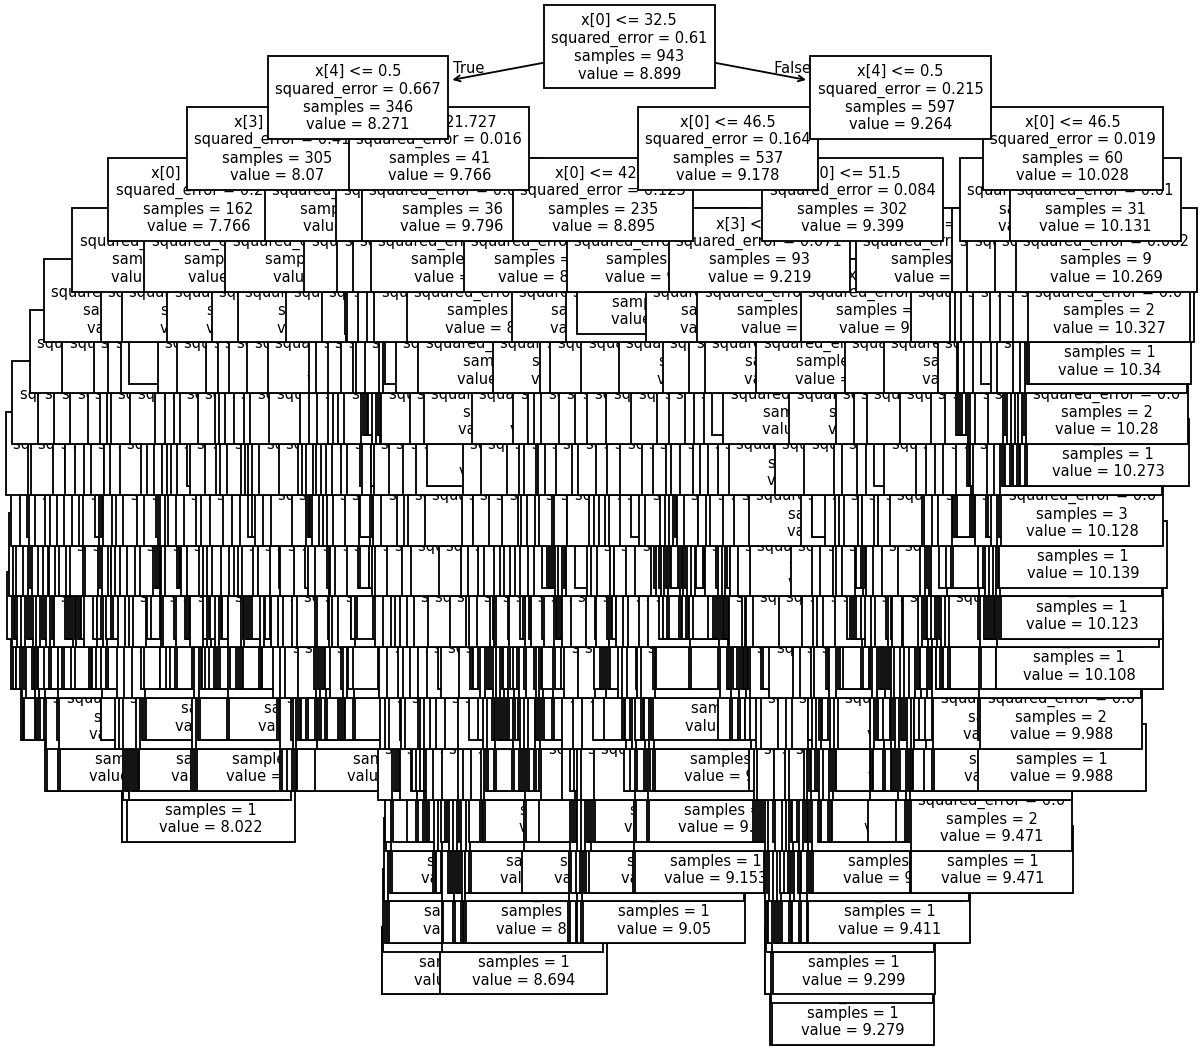

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10),dpi=132)
plot_tree(model,fontsize=8)
plt.show()

Decision Tree Regressor parameters

In [ ]:
clf=DecisionTreeRegressor(criterion="absolute_error",max_depth=3)
clf=clf.fit(x_train1,y_train1)
y_pred=clf.predict(x_test1)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.27759897561353064

In [ ]:
metrics.mean_absolute_error(y_test1,y_pred1)

0.3132113384702529

In [ ]:
mean_squared_error(y_test1,y_pred1)

0.4325397271159404

In [ ]:
mse = mean_squared_error(y_test1,y_pred1)
rmse= np.sqrt(mse)
rmse

np.float64(0.6576775251716759)

In [ ]:
mape=mean_absolute_percentage_error(y_test1,y_pred1)
print(mape)
mape=mape*100
mape

0.03434729732916787


3.434729732916787

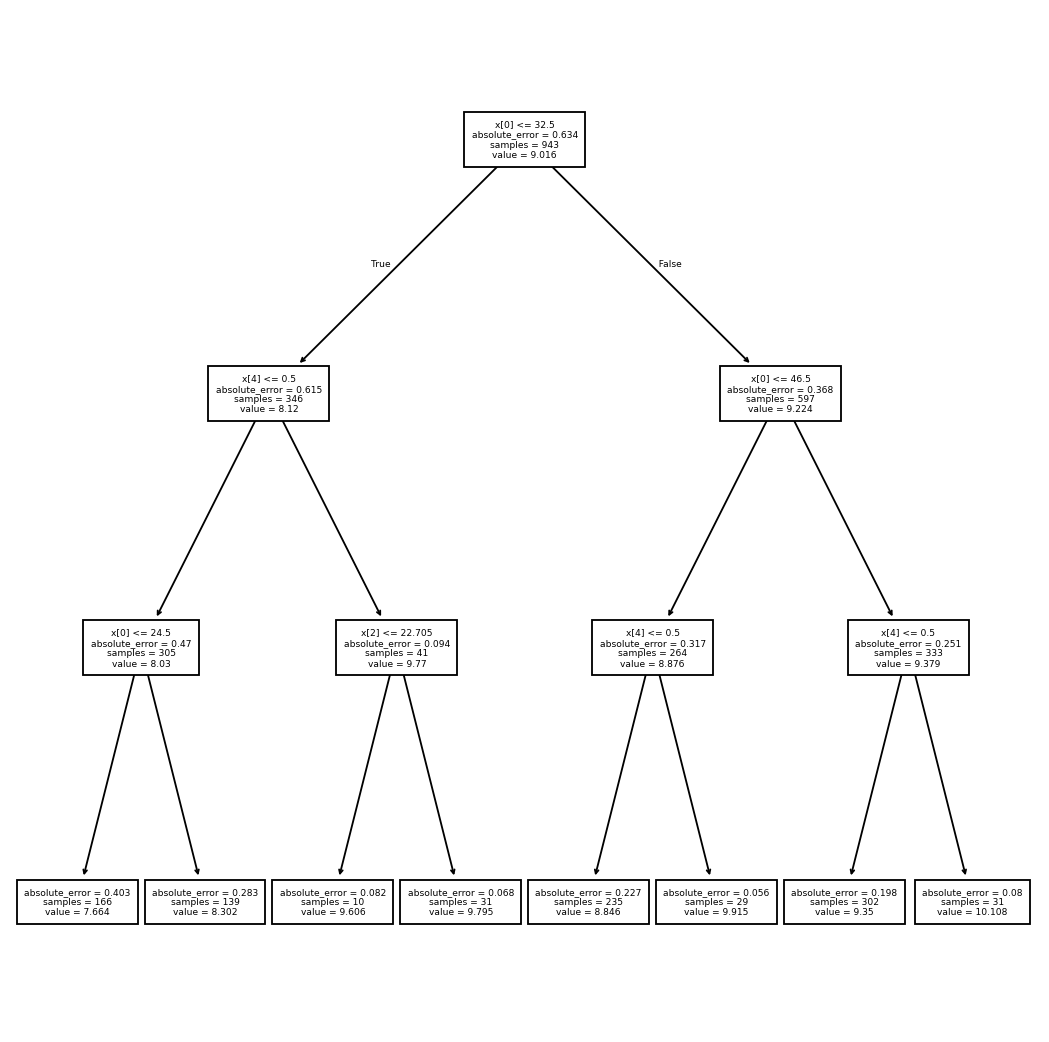

In [ ]:
plt.figure(figsize=(10,10),dpi=132)
plot_tree(clf,fontsize=5)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Create the model
dt = DecisionTreeRegressor()

# 5-fold cross-validation on the training set
cv_scores = cross_val_score(dt, x_train1, y_train1, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R² Score:", cv_scores.mean())

Cross-Validation R² Scores: [0.53041369 0.59249739 0.73692626 0.68384009 0.55162673]
Average CV R² Score: 0.6190608310366581


In [ ]:
model.fit(x_train2,y_train2)

DecisionTreeRegressor()

In [ ]:
y_pred2= model.predict(x_test2)
y_pred2

array([ 8.50709411,  9.74351487,  9.86266264,  9.10097859,  7.59165074,
        8.7730507 ,  9.0600387 ,  9.18792575,  9.65214954,  9.37944514,
        9.58684966,  8.54172749,  9.44511261,  8.95281831,  9.40050426,
        7.39539676,  8.12928266,  9.35480633,  7.39153144,  9.7792355 ,
        9.02967716,  9.01824533,  7.97713407,  9.12091499,  7.80780284,
        9.58684966,  9.35118043,  9.00167648,  8.48609876,  8.84408284,
        8.41836176,  9.56898262,  9.57843962,  9.05247776, 10.05383631,
        9.17135653,  9.11148425,  7.93345897,  8.81138283,  7.86241213,
        9.63104372,  9.17411742,  7.3998467 ,  9.28143896,  9.47364332,
        9.77340049,  9.58040834,  9.07855021,  8.28953366,  9.56898262,
        8.46527926,  9.24528667,  9.54732833,  9.30702912,  8.86014425,
        9.63104372,  9.65214954,  9.38820417,  8.59705026,  9.19022829,
        8.95420051,  9.265291  ,  7.51601809,  9.02815371,  7.51321485,
        7.69778951,  9.57208793,  9.41118521,  7.14001079,  8.64

In [ ]:
dtr = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
dtr

,Predicted,Actual
210,8.507094,8.403622
58,9.743515,9.715818
671,9.862663,9.854343
582,9.100979,10.180826
218,7.591651,7.594348
...,...,...
1039,9.286925,7.972290
1175,7.697909,7.698927
622,9.224355,9.236441
788,9.057457,8.887903


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test2,y_pred2)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test2,y_pred2)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)
mse=mean_squared_error(y_test2,y_pred2)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test2,y_pred2)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.3494916691300469
mae= 0.2971764288253783
mse= 0.38327219124782647
rmse= 0.6190898087093879
0.03267364940692366
mape= 3.267364940692366


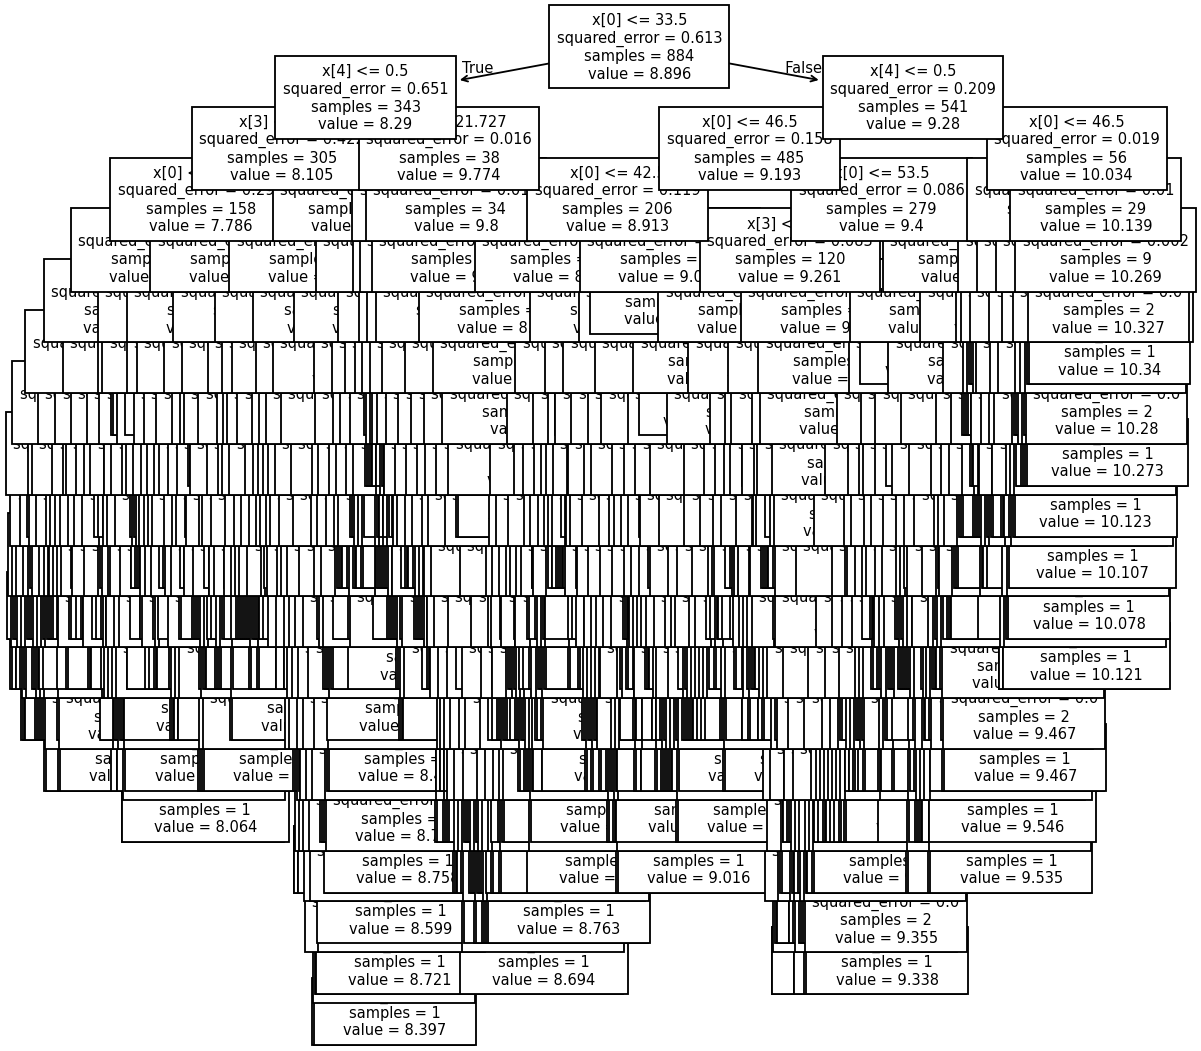

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10),dpi=132)
plot_tree(model,fontsize=8)
plt.show()

decision tree parameter

In [ ]:
clf=DecisionTreeRegressor(criterion="absolute_error",max_depth=3)
clf=clf.fit(x_train2,y_train2)
y_pred=clf.predict(x_test2)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)
print("rmse=",rmse)
mae=metrics.mean_absolute_error(y_test2,y_pred2)
print("mae=",mae)
mean_squared_error(y_test2,y_pred2)
mse = mean_squared_error(y_test2,y_pred2)
print("mse=",mse)
rmse= np.sqrt(mse)
print("rmse=",rmse)
mape=mean_absolute_percentage_error(y_test2,y_pred2)
mape=mape*100
mape
print("mape",mape)

rmse= 0.6190898087093879
mae= 0.2971764288253783
mse= 0.38327219124782647
rmse= 0.6190898087093879
mape 3.267364940692366


In [ ]:
model.fit(x_train3,y_train3)

DecisionTreeRegressor()

In [ ]:
y_pred3= model.predict(x_test3)
y_pred3

array([ 8.35847076,  9.74351487,  9.85074558,  9.05449407,  7.59165074,
        8.8242165 ,  9.12970026,  9.1364814 ,  9.63104372,  9.37944514,
        9.45949899,  8.54172749,  9.93451535,  8.79384085,  9.41480106,
        7.39539676,  8.12928266,  9.31312953,  7.39153144,  9.68752469,
        8.99763216,  8.94672242,  8.27030162,  9.14754391,  7.80780284,
        9.45949899,  9.47633897,  9.94648882,  8.39703842,  8.8726137 ,
        8.44905139,  9.5382726 ,  9.57843962,  9.12628881, 10.05383631,
        9.17135653,  8.99568383,  7.93345897,  8.98149522,  7.86241213,
        9.63104372,  9.22992456,  7.3998467 ,  9.19022829,  9.47364332,
        9.7514245 ,  9.11622726,  9.06776146,  8.37780744,  9.5382726 ,
        8.51774958,  9.17411742,  9.54732833,  9.18036229,  8.86014425,
        9.63104372,  9.63104372,  9.33725735,  8.59371278,  8.99568383,
        8.99763216,  9.265291  ,  7.51601809,  9.94648882, 10.23006416,
        7.69778951,  8.56523012,  9.37109214,  7.14001079,  8.64

In [ ]:
dtr = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
dtr

,Predicted,Actual
210,8.358471,8.403622
58,9.743515,9.715818
671,9.850746,9.854343
582,9.054494,10.180826
218,7.591651,7.594348
...,...,...
660,9.878966,9.880180
584,8.757197,8.769604
566,9.483670,9.483710
72,9.346206,9.312281


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test3,y_pred3)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test3,y_pred3)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)
mse=mean_squared_error(y_test3,y_pred3)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test3,y_pred3)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.4285369436593611
mae= 0.2763934412484953
mse= 0.34496259298239607
rmse= 0.5873351623923057
0.030384893625292002
mape= 3.0384893625292


parameter

In [ ]:
clf=DecisionTreeRegressor(criterion="absolute_error",max_depth=3)
clf=clf.fit(x_train3,y_train3)
y_pred=clf.predict(x_test3)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)
print("rmse=",rmse)
mae=metrics.mean_absolute_error(y_test3,y_pred3)
print("mae=",mae)
mean_squared_error(y_test3,y_pred3)
mse = mean_squared_error(y_test3,y_pred3)
print("mse=",mse)
rmse= np.sqrt(mse)
print("rmse=",rmse)
mape=mean_absolute_percentage_error(y_test3,y_pred3)
mape=mape*100
mape
print("mape",mape)

rmse= 0.5873351623923057
mae= 0.2763934412484953
mse= 0.34496259298239607
rmse= 0.5873351623923057
mape 3.0384893625292


In [ ]:
model.fit(x_train4,y_train4)

DecisionTreeRegressor()

In [ ]:
y_pred4= model.predict(x_test4)
y_pred4

array([ 8.46666525,  9.74351487,  9.76974505,  9.05449407,  7.59165074,
        8.89309293,  9.12628881,  9.18792575, 10.23786072,  9.37944514,
        9.58684966,  8.75719712,  9.44511261,  8.79384085,  9.40050426,
        7.39539676,  8.12928266,  9.34609617,  7.39153144,  9.68752469,
        9.02967716, 10.12322717,  8.25522409,  9.12091499,  7.80780284,
        9.58684966,  9.33308305,  9.05384409,  9.87520914,  8.8726137 ,
        8.44905139,  9.56898262,  9.47364332,  9.06271482, 10.05383631,
        9.15349299,  9.11148425,  7.93345897,  8.88207251,  7.86241213,
       10.20362862,  9.17411742,  7.3998467 ,  9.19022829,  9.51902719,
        9.7514245 ,  9.58040834,  8.99568383,  9.74849471,  9.56898262,
        8.46612513,  9.24528667,  9.54689359,  9.19022829,  8.87536456,
       10.23786072, 10.23786072,  9.38820417,  8.59705026,  9.22177562,
        9.02967716,  9.265291  ,  7.51601809,  9.02916721, 10.23006416,
        7.69778951,  8.37110578,  9.40340519,  7.14001079,  8.64

In [ ]:
dtr = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
dtr

,Predicted,Actual
210,8.466665,8.403622
58,9.743515,9.715818
671,9.769745,9.854343
582,9.054494,10.180826
218,7.591651,7.594348
...,...,...
557,8.232518,8.121679
801,8.262895,8.486099
570,8.718908,8.719900
365,9.146992,9.120520


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test4,y_pred4)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test4,y_pred4)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)
mse=mean_squared_error(y_test4,y_pred4)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test4,y_pred4)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.4412631905422688
mae= 0.27528673630898864
mse= 0.3319099712975498
rmse= 0.576116282791547
0.030123966139871304
mape= 3.0123966139871303


parameter

In [ ]:
clf=DecisionTreeRegressor(criterion="absolute_error",max_depth=3)
clf=clf.fit(x_train4,y_train4)
y_pred=clf.predict(x_test4)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)
print("rmse=",rmse)
mae=metrics.mean_absolute_error(y_test4,y_pred4)
print("mae=",mae)
mean_squared_error(y_test4,y_pred4)
mse = mean_squared_error(y_test4,y_pred4)
print("mse=",mse)
rmse= np.sqrt(mse)
print("rmse=",rmse)
mape=mean_absolute_percentage_error(y_test4,y_pred4)
mape=mape*100
mape
print("mape",mape)

rmse= 0.576116282791547
mae= 0.27528673630898864
mse= 0.3319099712975498
rmse= 0.576116282791547
mape 3.0123966139871303


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()

In [ ]:
model.fit(x_train1,y_train1)

RandomForestRegressor()

In [ ]:
y_pred1=model.predict(x_test1)
y_pred1

array([ 8.4686808 ,  9.8889331 ,  9.86991558,  9.20615398,  7.60145745,
        8.84304417,  9.13779542,  9.1321059 ,  9.77156028,  9.39448572,
        9.56008043,  9.05451972,  9.52672883,  8.96075003,  9.48854218,
        7.39087128,  8.16489819,  9.36667191,  7.39592231,  9.71957475,
        9.13279048,  9.02007514,  8.30887177,  9.13224136,  8.09210482,
        9.57984005,  9.53905185,  9.08175733,  8.81405842,  8.81634466,
        8.56674154,  9.54381666,  9.54761658,  9.15453922, 10.08079661,
        9.17177712,  9.1317961 ,  7.93316507,  8.91980816,  7.7677859 ,
        9.90257611,  9.36810873,  7.39256226,  9.29798589,  9.52211243,
        9.7166925 ,  9.27821709,  9.08962   ,  8.72820276,  9.56427739,
        8.63023762,  9.19429102,  9.58954743,  9.27485224,  8.84218301,
        9.82829736,  9.8015735 ,  9.36590244,  8.78066822,  9.10800904,
        9.06573887,  9.25211087,  7.60393085,  9.04803934,  7.79444445,
        7.77213101,  9.05774024,  9.37876248,  7.14466362,  8.78

In [ ]:
rf = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
rf

,Predicted,Actual
210,8.468681,8.403622
58,9.888933,9.715818
671,9.869916,9.854343
582,9.206154,10.180826
218,7.601457,7.594348
...,...,...
519,8.647409,8.258736
813,9.703652,9.506818
224,8.736827,8.594336
971,9.760254,9.727723


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_test1)

1.0

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

0.2766357298242648

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

0.2525135010813632

In [ ]:
mse=mean_squared_error(y_test1,y_pred1)
rmse=np.sqrt(mse)
rmse

np.float64(0.5259617189722697)

In [ ]:
mape=mean_absolute_percentage_error(y_test1,y_pred1)
print(mape)
mape=mape*100
mape

0.027284408289033873


2.7284408289033872

In [ ]:
model.fit(x_train2,y_train2)

RandomForestRegressor()

In [ ]:
y_pred2= model.predict(x_test2)
y_pred2

array([ 8.48487756,  9.83816968,  9.84199236,  9.18091997,  7.61855754,
        8.85223722,  9.1505392 ,  9.1394943 ,  9.73854658,  9.38722844,
        9.57980526,  8.82923326,  9.57622024,  8.88153908,  9.58043778,
        7.39834468,  8.12971427,  9.38917418,  7.38880236,  9.72022154,
        9.13420043,  9.04700171,  8.31731466,  9.11672454,  8.00137609,
        9.58741039,  9.47077821,  9.11484237,  8.84026653,  8.85168686,
        8.71819965,  9.54452366,  9.55329852,  9.2172658 , 10.06451677,
        9.20166595,  9.11825337,  7.97070333,  8.89438544,  7.76000018,
        9.90477954,  9.2747871 ,  7.40048065,  9.34207398,  9.59201776,
        9.74316249,  9.2911868 ,  9.0628134 ,  8.78361938,  9.57747989,
        8.56083672,  9.18805559,  9.54222973,  9.3138349 ,  8.83248399,
        9.71888428,  9.80456365,  9.39051545,  8.87929296,  9.1657598 ,
        9.06252273,  9.23699668,  7.64379848,  9.05393283,  8.1215266 ,
        7.78403277,  8.86766638,  9.3890076 ,  7.13866181,  8.78

In [ ]:
rf = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
rf

,Predicted,Actual
210,8.484878,8.403622
58,9.838170,9.715818
671,9.841992,9.854343
582,9.180920,10.180826
218,7.618558,7.594348
...,...,...
1039,8.401304,7.972290
1175,7.775626,7.698927
622,9.263563,9.236441
788,8.968136,8.887903


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test2,y_pred2)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test2,y_pred2)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)
mse=mean_squared_error(y_test2,y_pred2)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test2,y_pred2)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.5842700234114312
mae= 0.2464612571700329
mse= 0.24494342583041032
rmse= 0.4949175949897218
0.026930449058219993
mape= 2.693044905821999


In [ ]:
model.fit(x_train3,y_train3)

RandomForestRegressor()

In [ ]:
y_pred3= model.predict(x_test3)
y_pred3

array([ 8.45101664,  9.88219473,  9.86267811,  9.17923215,  7.65307946,
        8.85805998,  9.16801245,  9.1467899 ,  9.88940042,  9.38732461,
        9.56991665,  8.97148445,  9.57592849,  8.86383756,  9.54581378,
        7.40187483,  8.16446267,  9.37498061,  7.41016677,  9.72620208,
        9.14307391,  9.00296753,  8.30792382,  9.10994063,  7.9186511 ,
        9.57511434,  9.47640954,  9.07945588,  8.7545283 ,  8.83460734,
        8.68285503,  9.55042991,  9.5527172 ,  9.12999644, 10.06842874,
        9.25450916,  9.12198143,  7.99576356,  8.8969991 ,  7.75282858,
        9.99776342,  9.2611054 ,  7.40076207,  9.33322907,  9.58612502,
        9.74857261,  9.34851461,  9.05399673,  8.8915447 ,  9.56605108,
        8.56068957,  9.20067293,  9.55746416,  9.26070358,  8.84216964,
        9.85885704,  9.94139899,  9.37549207,  8.77007902,  9.1032989 ,
        9.07341538,  9.22881318,  7.66100515,  9.23234737,  7.93463677,
        7.75141859,  8.79154195,  9.36913517,  7.16668658,  8.75

In [ ]:
rf = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
rf

,Predicted,Actual
210,8.451017,8.403622
58,9.882195,9.715818
671,9.862678,9.854343
582,9.179232,10.180826
218,7.653079,7.594348
...,...,...
660,9.883321,9.880180
584,9.159118,8.769604
566,9.485867,9.483710
72,9.328779,9.312281


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test3,y_pred3)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test3,y_pred3)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)
mse=mean_squared_error(y_test3,y_pred3)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test3,y_pred3)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.6341570689706018
mae= 0.23620996772293593
mse= 0.2208403932886158
rmse= 0.46993658432666824
0.025801011762320653
mape= 2.5801011762320654


In [ ]:
model.fit(x_train4,y_train4)

RandomForestRegressor()

In [ ]:
y_pred4= model.predict(x_test4)
y_pred4

array([ 8.4743811 ,  9.74257787,  9.8425788 ,  9.13897153,  7.62670683,
        8.86585911,  9.1386226 ,  9.14727559,  9.86729784,  9.38854853,
        9.61672   ,  8.97180063,  9.61453785,  8.86989098,  9.70093339,
        7.38836775,  8.21381194,  9.38169264,  7.39957306,  9.70284698,
        9.08507814,  9.00246126,  8.42624704,  9.13671125,  7.77968269,
        9.61366026,  9.52504061,  9.12389065,  8.73719156,  8.85046071,
        8.7143466 ,  9.53387397,  9.52352933,  9.17078933, 10.06545037,
        9.20431728,  9.12170131,  8.04408573,  8.90817586,  7.84168386,
        9.93592191,  9.28040146,  7.38983623,  9.30792404,  9.57397179,
        9.74027972,  9.31263418,  9.07236458,  8.99790772,  9.57680097,
        8.65044528,  9.22620995,  9.60793115,  9.27215601,  8.84126118,
        9.75200943,  9.90410258,  9.39541556,  8.72434942,  9.18838403,
        9.05891411,  9.25440873,  7.56728317,  9.19861912,  8.02788109,
        7.76016056,  8.90711024,  9.40229853,  7.14873009,  8.72

In [ ]:
rf = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
rf

,Predicted,Actual
210,8.474381,8.403622
58,9.742578,9.715818
671,9.842579,9.854343
582,9.138972,10.180826
218,7.626707,7.594348
...,...,...
557,8.196299,8.121679
801,8.664087,8.486099
570,8.738463,8.719900
365,9.240397,9.120520


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test4,y_pred4)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test4,y_pred4)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)
mse=mean_squared_error(y_test4,y_pred4)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test4,y_pred4)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.6508603213118875
mae= 0.2255592456572334
mse= 0.20740165811641195
rmse= 0.45541372192371626
0.024634286212741444
mape= 2.4634286212741445


Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
model = BaggingRegressor()

In [ ]:
model.fit(x_train1, y_train1)

BaggingRegressor()

In [ ]:
y_pred1 = model.predict(x_test1)
y_pred1

array([ 8.45213784,  9.87014348,  9.83938767,  9.31825881,  7.63881633,
        8.82217932,  9.19514019,  9.1441083 ,  9.94324969,  9.38515095,
        9.55865935,  8.84711132,  9.59288136,  8.87553765,  9.55487265,
        7.37010097,  8.12922914,  9.35146096,  7.39250888,  9.69890049,
        9.13657939,  8.96538221,  8.29923678,  9.09340564,  8.16069994,
        9.58956281,  9.48737479,  9.00488105,  8.78855352,  8.81496689,
        8.4876356 ,  9.53735585,  9.60581092,  9.03818625, 10.07378053,
        9.15426482,  9.12747504,  7.92749781,  8.90818711,  7.72046476,
        9.85729682,  9.21809546,  7.37188094,  9.35929233,  9.56353902,
        9.74065424,  9.25396931,  9.05986783,  8.90931665,  9.55123342,
        8.54918091,  9.28164309,  9.61759464,  9.30510395,  8.81866009,
        9.91409597,  9.92465658,  9.3494496 ,  9.06157183,  9.14635834,
        9.06311099,  9.25241724,  7.50136594,  9.1115835 ,  7.85412268,
        7.81804788,  9.05929652,  9.37253473,  7.14022004,  9.04

In [ ]:
dtf = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
dtf

,Predicted,Actual
210,8.452138,8.403622
58,9.870143,9.715818
671,9.839388,9.854343
582,9.318259,10.180826
218,7.638816,7.594348
...,...,...
519,8.229925,8.258736
813,9.707935,9.506818
224,8.945261,8.594336
971,9.728420,9.727723


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.5299227068065899

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

0.2661236412743404

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

0.28146015475817177

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

np.float64(0.5305281846972616)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

0.028826575250922394


2.8826575250922395

Bagging Regressor parameter

In [ ]:
# Create Bagging Regressor object
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Regressor
br = br.fit(x_train1,y_train1)

#Predict the response for test dataset
y_pred1 = br.predict(x_test1)

In [ ]:
r2_score(y_test1,y_pred1)

0.5400790763332952

In [ ]:
metrics.mean_absolute_error(y_test1,y_pred1)

0.25169469162263447

In [ ]:
mean_squared_error(y_test1,y_pred1)

0.2753789987862506

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

np.float64(0.5247656608299085)

In [ ]:
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

0.027184885041812372


2.718488504181237

In [ ]:
model.fit(x_train2,y_train2)

BaggingRegressor()

In [ ]:
y_pred2= model.predict(x_test2)
y_pred2

array([ 8.48046291,  9.88120273,  9.87488404,  9.12905904,  7.63077993,
        8.84339118,  9.42453734,  9.14279447,  9.78147929,  9.37619273,
        9.6259305 ,  8.75590908,  9.60648986,  9.01610163,  9.65672341,
        7.39610007,  8.12389154,  9.45161984,  7.39149374,  9.74030104,
        9.0596419 ,  9.06468517,  8.32022515,  9.08078086,  8.17129421,
        9.62996337,  9.54386022,  9.01066167,  8.93574754,  8.82939763,
        8.79812262,  9.5393583 ,  9.55215715,  9.18960661, 10.04316987,
        9.12981145,  9.13806537,  7.96791538,  8.91359731,  7.82858562,
        9.9001319 ,  9.20160052,  7.39877003,  9.29798916,  9.66214083,
        9.73800908,  9.36607523,  9.0210523 ,  8.78665025,  9.55877376,
        8.6468457 ,  9.25417398,  9.56604106,  9.36247507,  8.8345258 ,
        9.83995302,  9.85799685,  9.37168696,  8.86713327,  9.23038137,
        9.11536406,  9.24145119,  7.57790199,  9.11998722,  8.53254264,
        7.81825709,  8.99052114,  9.38847896,  7.14025309,  8.72

In [ ]:
dtf = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
dtf

,Predicted,Actual
210,8.480463,8.403622
58,9.881203,9.715818
671,9.874884,9.854343
582,9.129059,10.180826
218,7.630780,7.594348
...,...,...
1039,8.318960,7.972290
1175,7.829318,7.698927
622,9.250556,9.236441
788,8.902881,8.887903


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test2,y_pred2)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test2,y_pred2)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)
mse=mean_squared_error(y_test2,y_pred2)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test2,y_pred2)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.5629643570344531
mae= 0.24969198355554165
mse= 0.2574964848010448
rmse= 0.507441114614341
0.027294044595789428
mape= 2.7294044595789426


In [ ]:
# Create Bagging Regressor object
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Regressor
br = br.fit(x_train2,y_train2)

#Predict the response for test dataset
y_pred1 = br.predict(x_test2)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test2,y_pred2)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test2,y_pred2)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)
mse=mean_squared_error(y_test2,y_pred2)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test2,y_pred2)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.5629643570344531
mae= 0.24969198355554165
mse= 0.2574964848010448
rmse= 0.507441114614341
0.027294044595789428
mape= 2.7294044595789426


In [ ]:
model.fit(x_train3,y_train3)

BaggingRegressor()

In [ ]:
y_pred3= model.predict(x_test3)
y_pred3

array([ 8.43949956,  9.86424662,  9.8833581 ,  9.18261799,  7.71553758,
        8.85468775,  9.19205575,  9.12098201,  9.77673887,  9.39228039,
        9.58305179,  8.75057989,  9.44431348,  8.86326384,  9.47061331,
        7.39584791,  8.12336017,  9.4645333 ,  7.42148792,  9.7174971 ,
        9.12234913,  8.95884342,  8.25292414,  9.12138792,  8.19933364,
        9.59066626,  9.61656015,  9.15649216,  8.63475481,  8.8058272 ,
        8.60966543,  9.56923492,  9.55483469,  9.05272246, 10.07076885,
        9.16348407,  9.11056637,  7.94308804,  8.90600712,  7.77935415,
        9.80970639,  9.20549537,  7.39851787,  9.2877019 ,  9.56072541,
        9.73081861,  9.31711595,  9.0464462 ,  8.47202258,  9.61926366,
        8.56105313,  9.17099949,  9.50847355,  9.22463504,  8.83714587,
        9.77621486,  9.83896695,  9.36215737,  8.6544576 ,  9.07306201,
        9.06407075,  9.23070599,  7.52636356,  9.25570183,  7.94973483,
        7.94902007,  8.86310332,  9.45708379,  7.13921469,  8.72

In [ ]:
dtf = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
dtf

,Predicted,Actual
210,8.439500,8.403622
58,9.864247,9.715818
671,9.883358,9.854343
582,9.182618,10.180826
218,7.715538,7.594348
...,...,...
660,9.888854,9.880180
584,9.144932,8.769604
566,9.482684,9.483710
72,9.343993,9.312281


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test3,y_pred3)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test3,y_pred3)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)
mse=mean_squared_error(y_test3,y_pred3)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test3,y_pred3)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.6489357006411065
mae= 0.2295150758136164
mse= 0.2119193002359265
rmse= 0.460346934643782
0.02506425075891802
mape= 2.506425075891802


In [ ]:
# Create Bagging Regressor object
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Regressor
br = br.fit(x_train3,y_train3)

#Predict the response for test dataset
y_pred1 = br.predict(x_test3)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test3,y_pred3)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test3,y_pred3)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)
mse=mean_squared_error(y_test3,y_pred3)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test3,y_pred3)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.6489357006411065
mae= 0.2295150758136164
mse= 0.2119193002359265
rmse= 0.460346934643782
0.02506425075891802
mape= 2.506425075891802


In [ ]:
model.fit(x_train4,y_train4)

BaggingRegressor()

In [ ]:
y_pred4= model.predict(x_test4)
y_pred4

array([ 8.64125836,  9.7270035 ,  9.83360593,  9.15249999,  7.63213676,
        8.84736495,  9.1060578 ,  9.22791441,  9.95419309,  9.37372539,
        9.56923281,  8.90310543,  9.48162507,  8.89416917,  9.62494964,
        7.44425763,  8.41173169,  9.38265953,  7.3927057 ,  9.68758401,
        9.11064509,  9.04596002,  8.23238991,  9.11589764,  7.78301611,
        9.56923281,  9.4584872 ,  9.29711281,  8.89942872,  8.81320042,
        8.75916184,  9.54370333,  9.53628889,  9.20212218, 10.05477394,
        9.1717221 ,  9.10958132,  8.01236559,  8.90522604,  7.67988432,
        9.89216486,  9.40865591,  7.44603761,  9.29676956,  9.49771826,
        9.71830873,  9.30252873,  9.0364681 ,  9.14980719,  9.60569035,
        8.62164906,  9.24649496,  9.59760688,  9.20300521,  8.84769706,
        9.77007849, 10.08056949,  9.34652886,  8.78846972,  9.26766806,
        9.05488824,  9.35588456,  7.55653559,  9.27595962,  7.60082007,
        7.81801709,  9.15639281,  9.37453168,  7.20962222,  8.69

In [ ]:
dtf = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
dtf

,Predicted,Actual
210,8.641258,8.403622
58,9.727004,9.715818
671,9.833606,9.854343
582,9.152500,10.180826
218,7.632137,7.594348
...,...,...
557,8.219616,8.121679
801,8.664083,8.486099
570,8.737244,8.719900
365,9.177917,9.120520


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test4,y_pred4)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test4,y_pred4)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)
mse=mean_squared_error(y_test4,y_pred4)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test4,y_pred4)
mape=mape*100
print("mape=",mape)

r2 score 0.6336986296861659
mae= 0.23152227935166741
mse= 0.21759632665890322
rmse= 0.46647221424100194
mape= 2.5278269002566094


In [ ]:
# Create Bagging Regressor object
from sklearn.tree import DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=18, random_state=42)
br = BaggingRegressor(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Regressor
br = br.fit(x_train4,y_train4)

#Predict the response for test dataset
y_pred1 = br.predict(x_test4)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test4,y_pred4)
print("r2 score",r2)
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test4,y_pred4)
print("mae=",mae)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)
mse=mean_squared_error(y_test4,y_pred4)
print("mse=",mse)
rmse=np.sqrt(mse)
print("rmse=",rmse)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test4,y_pred4)
print(mape)
mape=mape*100
print("mape=",mape)

r2 score 0.6336986296861659
mae= 0.23152227935166741
mse= 0.21759632665890322
rmse= 0.46647221424100194
0.025278269002566096
mape= 2.5278269002566094


#Boosting Regressor

AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model = AdaBoostRegressor()

In [ ]:
model.fit(x_train4, y_train4)

AdaBoostRegressor()

In [ ]:
y_pred4 = model.predict(x_test4)
y_pred4

array([ 9.03867882,  9.21690208,  9.24768183,  9.43522708,  8.79176277,
        9.09237162,  9.42693175,  9.42693175,  9.48703321,  9.44335368,
        8.89579693,  9.09221239,  9.44335368,  9.21690208,  9.5757569 ,
        7.78441759,  8.95367227,  9.44335368,  7.70271971,  9.23803532,
        9.4064476 ,  9.17360217,  8.95367227,  9.43187595,  8.63022128,
        9.23803532,  9.46431876,  9.41675528,  8.95715948,  9.09237162,
        8.93029342,  9.44335368,  9.62541056,  9.42693175,  9.8614573 ,
        9.43187595,  9.44335368,  8.95367227,  9.26955496,  8.42102498,
        9.48703321,  9.46431876,  7.78441759,  9.41889912,  9.60514865,
        9.03867882,  9.42693175,  9.41889912,  9.03867882,  9.44335368,
        9.09221239,  9.43600199,  9.44335368,  9.41562997,  9.09237162,
        9.44335368,  9.44335368,  9.44335368,  9.05836121,  9.41889912,
        9.4064476 ,  9.44335368,  8.35078878,  9.41675528,  8.42102498,
        8.35078878,  8.80172041,  9.46431876,  7.76286192,  9.01

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
dt

,Predicted,Actual
210,9.038679,8.403622
58,9.216902,9.715818
671,9.247682,9.854343
582,9.435227,10.180826
218,8.791763,7.594348
...,...,...
557,8.951763,8.121679
801,9.035884,8.486099
570,9.092372,8.719900
365,9.443354,9.120520


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.518792047309141

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

0.43289741887364985

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

0.2858550127040779

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

np.float64(0.5346541056646604)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test4, y_pred4)
print(mape)
mape = mape * 100
print(mape)
mae=mean_absolute_percentage_error(y_test4, y_pred4)
print("mae=",mae)

0.04967810704711542
4.9678107047115425
mae= 0.04967810704711542


ADABoosting regressor parameter

**GradientBoost_regressor**

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1= train_test_split(
    x, y, test_size=0.4, random_state=42, stratify=None  # drop stratify for regression
)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
model.fit(X_train1, y_train1)

GradientBoostingRegressor()

In [ ]:
y_pred1 = model.predict(X_test1)

In [ ]:
y_pred1

array([ 8.55478257,  9.81661452,  9.95465197,  9.30060711,  7.8681003 ,
        8.90081162,  9.25191   ,  9.24582313,  9.7969921 ,  9.35033107,
        9.33135031,  8.71578628,  9.39360428,  8.82089597,  9.61968343,
        7.50817268,  8.24410076,  9.46054072,  7.30903254,  9.50246153,
        9.08486266,  9.03946458,  8.43788885,  9.15553884,  7.85726322,
        9.55296671,  9.60781686,  9.10423009,  8.60585119,  8.81907534,
        8.64409867,  9.5145101 ,  9.4763844 ,  9.06252444, 10.0734697 ,
        9.21372321,  9.21918195,  8.22134936,  8.95490472,  7.67404469,
        9.8284146 ,  9.34707484,  7.47356388,  9.35822706,  9.5026894 ,
        9.66757114,  9.27842295,  9.18459262,  9.14609482,  9.62324087,
        8.74809972,  9.20446075,  9.67118332,  9.30650409,  8.83839937,
        9.7379489 ,  9.72506893,  9.4432302 ,  8.89892001,  9.25485948,
        9.09416275,  9.34890927,  7.71122572,  9.12014904,  7.69826863,
        7.79158549,  8.70273161,  9.39604645,  7.21086797,  8.74

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
dt

,Predicted,Actual
210,8.554783,8.403622
58,9.816615,9.715818
671,9.954652,9.854343
582,9.300607,10.180826
218,7.868100,7.594348
...,...,...
557,8.261474,8.121679
801,8.742405,8.486099
570,8.818867,8.719900
365,9.259575,9.120520


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.6505998839182751

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

0.22304981964511905

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

0.2075563673934374

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

np.float64(0.4555835460082348)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

0.024494346309238548


2.4494346309238546

GradientBoosting_Regressor Parameter

In [ ]:
# Create Boosting Regressor object
br = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='quantile', criterion='squared_error') #'quantile', 'huber', 'absolute_error', 'squared_error'

# Train Boosting Regressor
br = br.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred = br.predict(X_test1)

In [ ]:
r2_score(y_test1,y_pred1)

0.6505998839182751

In [ ]:
metrics.mean_absolute_error(y_test1,y_pred1)

0.22304981964511905

In [ ]:
mean_squared_error(y_test1,y_pred1)

0.2075563673934374

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

np.float64(0.4555835460082348)

In [ ]:
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

0.024494346309238548


2.4494346309238546

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
scores = cross_val_score(model, X_train1, y_train1, cv=5, scoring='r2')
print("Cross-validated R2:", scores)
print("Mean R2:", scores.mean())

Cross-validated R2: [0.63423186 0.84241138 0.81695435 0.82796325 0.7541876 ]
Mean R2: 0.7751496875673547


In [ ]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1= train_test_split(
    x, y, test_size=0.4, random_state=42, stratify=None  # drop stratify for regression
)


XGBoost_regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(x_train1, y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred1 = model.predict(x_test1)

In [ ]:
y_pred1

array([ 8.33276  , 10.104151 , 10.299914 ,  9.285882 ,  7.6110725,
        8.844497 ,  9.081822 ,  9.184209 ,  9.810144 ,  9.360827 ,
        9.518679 ,  8.73364  ,  9.601491 ,  8.92441  ,  9.626901 ,
        7.4307766,  7.9749722,  9.442349 ,  7.2857065,  9.751369 ,
        9.058443 ,  9.295892 ,  8.218371 ,  9.11568  ,  8.018754 ,
        9.591633 ,  9.338906 ,  9.111712 ,  8.869266 ,  8.826481 ,
        8.76117  ,  9.477011 ,  9.450236 ,  9.06073  ,  9.962898 ,
        9.170966 ,  9.172554 ,  7.759461 ,  8.935127 ,  7.9009905,
       10.033243 ,  9.314807 ,  7.3918567,  9.21848  ,  9.44198  ,
        9.878522 ,  9.268013 ,  9.102527 ,  9.11367  ,  9.557893 ,
        9.172584 ,  9.160545 ,  9.589886 ,  9.187196 ,  8.834926 ,
        9.713279 ,  9.763362 ,  9.288546 ,  9.250755 ,  9.242673 ,
        9.030235 ,  9.296263 ,  7.5576453,  9.238701 ,  8.116162 ,
        7.7060385,  8.566964 ,  9.626334 ,  7.448859 ,  8.63267  ,
       10.062854 ,  9.340528 ,  9.107066 ,  7.8353333,  9.1507

In [ ]:
dtf = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
dtf

,Predicted,Actual
210,8.332760,8.403622
58,10.104151,9.715818
671,10.299914,9.854343
582,9.285882,10.180826
218,7.611073,7.594348
...,...,...
557,8.148632,8.121679
801,8.763044,8.486099
570,8.791516,8.719900
365,9.492382,9.120520


Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.5955579330106969

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

0.2605129869016252

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

0.2402532866524816

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

np.float64(0.49015638999454203)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

0.02879715237252532


2.879715237252532

XGBoosting_Regressor parameter

In [ ]:
# Create Boosting Regressor object
br = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)

# Train Boosting Regressor
br = br.fit(x_train1,y_train1)

#Predict the response for test dataset
y_pred1 = br.predict(x_test1)

In [ ]:
r2_score(y_test1,y_pred1)

In [ ]:
metrics.mean_absolute_error(y_test1,y_pred1)

In [ ]:
mean_squared_error(y_test1,y_pred1)

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

In [ ]:
mape = mean_absolute_percentage_error(y_test1, y_pred1)
print(mape)
mape = mape * 100
mape

ANN

In [ ]:
#ann
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.40, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.30, random_state=42)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.25, random_state=42)
x_train4 ,x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.20, random_state=42)
x_train ,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

#  Model 1 : 60-40 Split
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(
        loss=tf.keras.losses.MeanAbsoluteError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
               ]
)

history1 = model1.fit(x_train1, y_train1, epochs=10, verbose=1)

In [ ]:
print(" Model 1 (60-40 Split)")
print(model1.evaluate(x_test1, y_test1, verbose=1))
print()

In [ ]:
# Model 2 : 70-30 Split
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
        ]
)

history2 = model2.fit(x_train2, y_train2, epochs=10, verbose=1)

In [ ]:
print(" Model 2 (70-30 Split)")
print(model2.evaluate(x_test2, y_test2, verbose=1))
print()

In [ ]:
#  Model 3 : 75-25 Split
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
            tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
            ]
)

history3 = model3.fit(x_train3, y_train3, epochs=10, verbose=1)

In [ ]:
print(" Model 3 (75-25 Split)")
print(model3.evaluate(x_test3, y_test3, verbose=1))
print()

In [ ]:

# Model 4 : 80-20 Split
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
             tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
             ]
)

history4 = model4.fit(x_train4, y_train4, epochs=10, verbose=1)

In [ ]:
print(" Model 4 (80-20 Split)")
print(model4.evaluate(x_test4, y_test4, verbose=1))
print()

In [ ]:

# Model 5 : Basic ANN
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(7),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model5.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(),   # or SGD
    metrics=["mae","mape"]
)

history5 = model5.fit(x_train, y_train, epochs=10, verbose=1)

In [ ]:
print(" Model 5 (Basic ANN)")
print(model5.evaluate(x_test, y_test, verbose=1))
print()

In [ ]:
# Model 6 : Simple Linear Output
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model6.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
        tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
    ]
)

history6 = model6.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
print(" Model 6 (Simple Linear Output)")
print(model6.evaluate(x_test, y_test, verbose=1))
print()

In [ ]:
# Model 7 : Deeper ANN
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model7.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
             tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
             ]
)

history7 = model7.fit(x_train, y_train, epochs=300, verbose=1)

In [ ]:
print(" Model 7 (Deeper ANN)")
print(model7.evaluate(x_test, y_test, verbose=1))
print()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Store histories in a dictionary
histories = {
    "Model 1 (60-40 Split)": history1,
    "Model 2 (70-30 Split)": history2,
    "Model 3 (75-25 Split)": history3,
    "Model 4 (80-20 Split)": history4,
    "Model 5 (Basic ANN)": history5,
    "Model 6 (Simple Linear Output)": history6,
    "Model 7 (Deeper ANN)": history7
}

# Plot for each model
for name, hist in histories.items():
    plt.figure(figsize=(8,4))
    pd.DataFrame(hist.history).plot(ax=plt.gca())
    plt.title(f"Training History - {name}")
    plt.ylabel("Loss / Metrics")
    plt.xlabel("Epochs")
    plt.grid(True)
    plt.show()


optimizer using SGD

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

#  Model 1 : 60-40 Split
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
            tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
            ]
)

history1 = model1.fit(x_train1, y_train1, epochs=300, verbose=1)

In [ ]:
print(" Model 1 (60-40 Split)")
print(model1.evaluate(x_test1, y_test1, verbose=1))
print()

In [ ]:
# Model 2 : 70-30 Split
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
             tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
             ]
)

history2 = model2.fit(x_train2, y_train2, epochs=300, verbose=1)

In [ ]:
print(" Model 2 (70-30 Split)")
print(model2.evaluate(x_test2, y_test2, verbose=1))
print()

In [ ]:
#  Model 3 : 75-25 Split
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
            tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
            ]
)

history3 = model3.fit(x_train3, y_train3, epochs=350, verbose=1)

In [ ]:
print(" Model 3 (75-25 Split)")
print(model3.evaluate(x_test3, y_test3, verbose=1))
print()

In [ ]:

# Model 4 : 80-20 Split
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
            tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
            ]
)

history4 = model4.fit(x_train4, y_train4, epochs=10, verbose=1)

In [ ]:
print(" Model 4 (80-20 Split)")
print(model4.evaluate(x_test4, y_test4, verbose=1))
print()

In [ ]:

# Model 5 : Basic ANN
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(7),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model5.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae","mape"]
)

history5 = model5.fit(x_train, y_train, epochs=10, verbose=1)

In [ ]:
print(" Model 5 (Basic ANN)")
print(model5.evaluate(x_test, y_test, verbose=1))
print()

In [ ]:
# Model 6 : Simple Linear Output
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model6.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
            tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
            ]
)

history6 = model6.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
print(" Model 6 (Simple Linear Output)")
print(model6.evaluate(x_test, y_test, verbose=1))
print()

In [ ]:
# Model 7 : Deeper ANN
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model7.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
              tf.keras.metrics.MeanAbsolutePercentageError(name="mape")
             ]
)

history7 = model7.fit(x_train, y_train, epochs=500, verbose=1)

In [ ]:
print(" Model 7 (Deeper ANN)")
print(model7.evaluate(x_test, y_test, verbose=1))
print()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Store histories in a dictionary
histories = {
    "Model 1 (60-40 Split)": history1,
    "Model 2 (70-30 Split)": history2,
    "Model 3 (75-25 Split)": history3,
    "Model 4 (80-20 Split)": history4,
    "Model 5 (Basic ANN)": history5,
    "Model 6 (Simple Linear Output)": history6,
    "Model 7 (Deeper ANN)": history7
}

# Plot for each model
for name, hist in histories.items():
    plt.figure(figsize=(8,4))
    pd.DataFrame(hist.history).plot(ax=plt.gca())
    plt.title(f"Training History - {name}")
    plt.ylabel("Loss / Metrics")
    plt.xlabel("Epochs")
    plt.grid(True)
    plt.show()
